# Inference for Means

In [1]:
from IPython.display import Markdown
base_path = (
    "https://raw.githubusercontent.com/rezahabibi96/GitBook/refs/heads/main/"
    "books/applied-statistics-with-python/.resources"
)

In [40]:
import math
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.utils import resample
from scipy.stats import norm, binom, chi2, chisquare, chi2_contingency, expon, shapiro, t, wilcoxon
from statsmodels.stats.power import TTestPower, TTestIndPower

import seaborn as sns
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.pyplot import figure

import requests
from io import BytesIO

In previous chapters, we concentrated on categorical variables, so we could only consider counts and proportions. In this chapter, we will look at numerical variables, so means tests can be considered.

## One-Sample Mean Tests

Similar to modeling the sample proportion $\hat{p}$ with normal distribution, the sample mean $x$ can also be modeled with a normal distribution as shown below.

**Central Limit Theorem for the Means**

If a sample of size $n$ of independent observations from a population with any distribution having mean $\mu$ and standard deviation $\sigma$ is sufficiently large, the sampling distribution of sample means $x$ will be nearly normal with

Mean $= \mu$

Standard Error $= SE = \frac{\sigma}{\sqrt{n}}$ $(7.1)$

Note, in addition, that *if the original population distribution is normal*, then this theorem holds for samples of **any size**.

What is remarkable is that this is true for *any distribution*; the original distribution does *NOT have to be bell-shaped*. Proving this theorem, much like the Central Limit Theorem (CLT) for proportions, would require a more advanced course, but it can be illustrated with a simulation again. We use exponential distribution, which is always skewed right, as shown in the Figure below. A waiting time in line or lifetimes of some devices tend to have such skewed right distributions. We use it here purely for illustration purposes.

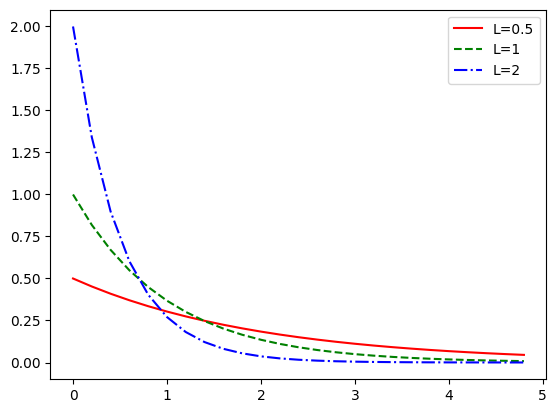

In [7]:
L = 0.5; # shape parameter lambda, scale = 1 / lambda = mean
xv = np.arange(0,5,0.2)
dv1 = expon.pdf(x=xv,scale=1/L)
plt.plot(xv,dv1,'r-',label='L=0.5');

L = 1
dv2 = expon.pdf(x=xv,scale=1/L)
plt.plot(xv,dv2,'g--',label='L=1');

L = 2
dv3 = expon.pdf(x=xv,scale=1/L)
plt.plot(xv,dv3,'b-.',label='L=2');

plt.legend();

The code below simulates the distribution of sample means from an exponential distribution with a mean of $1/2$. The sample sizes are $n = 100$.

xvbar = 0.499753, mu = 0.5, xvsd1 = 0.049781, sig/sqrt(n) = 0.050000


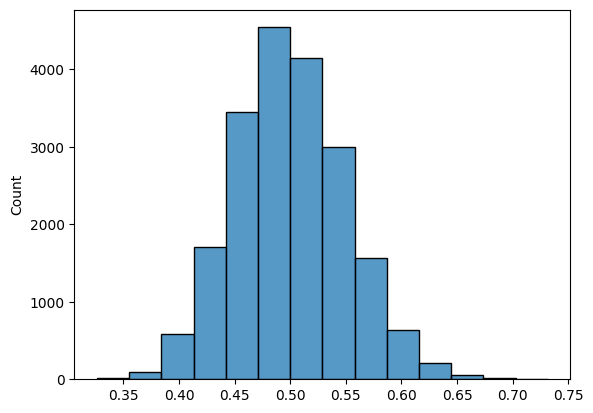

In [8]:
L = 2
n = 100; numsamples = 20000
xv = np.repeat(0.0,numsamples) # sample means

for j in range(numsamples):
    onesample = np.random.exponential(scale=1/L, size=n)
    xv[j] = np.mean(onesample)

sns.histplot(xv,bins=14) # create histogram of sample means

xvbar = np.mean(xv) # mean of sample means
xvsd1 = np.std(xv,ddof=1) # standard deviation of sample pmeans

print('xvbar = {:.6f}, mu = {:.1f}, xvsd1 = {:.6f}, sig/sqrt(n) = {:.6f}'.format(xvbar, 1/L, xvsd1, (1/L)/np.sqrt(n)))


The distribution of sample means (**sampling distribution**) is symmetric and bell-shaped (*normal distribution*), as can be seen in the Figure above. The center (*mean*) of this distribution of sample means is very close to the original population mean $\mu = \frac{1}{\lambda} = \frac{1}{2}$. The standard deviation (**standard error**) $SE$ is also very close to the value predicted by the CLT:
$ SE = \frac{\sigma}{\sqrt{n}} = \frac{1}{\sqrt{\lambda n}} = \sqrt{\frac{0.5}{100}} = 0.05 $

If we try to run it for a smaller sample size of $n = 30$, it still works. The mean is still 0.5, but the standard deviation increased.

xvbar = 0.500103, mu = 0.5, xvsd1 = 0.078469, sig/sqrt(n) = 0.079057


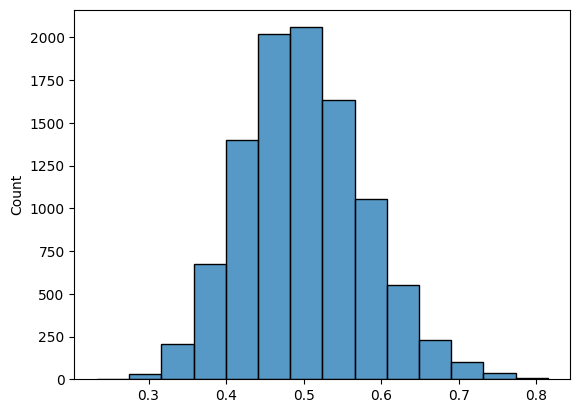

In [9]:
L = 2
n = 40; numsamples = 10000
xv = np.repeat(0.0,numsamples) # sample means

for j in range(numsamples):
    onesample = np.random.exponential(scale=1/L, size=n)
    xv[j] = np.mean(onesample)

sns.histplot(xv,bins=14) # create histogram of sample means

xvbar = np.mean(xv) # mean of sample means
xvsd1 = np.std(xv,ddof=1) # standard deviation of sample pmeans

print('xvbar = {:.6f}, mu = {:.1f}, xvsd1 = {:.6f}, sig/sqrt(n) = {:.6f}'.format(xvbar, 1/L, xvsd1, (1/L)/np.sqrt(n)))


The simulation below shows a very small sample size $n = 10$, and the distribution is skewed right and no longer bell-shaped, as the Figure shows.

xvbar = 0.501990, mu = 0.5, xvsd1 = 0.158367, sig/sqrt(n) = 0.158114


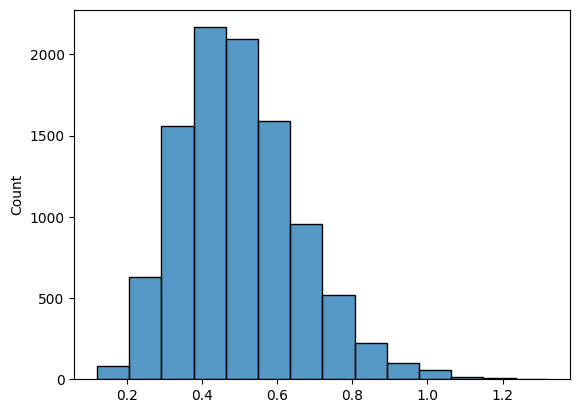

In [10]:
L = 2
n = 10; numsamples = 10000
xv = np.repeat(0.0,numsamples) # sample means

for j in range(numsamples):
    onesample = np.random.exponential(scale=1/L, size=n)
    xv[j] = np.mean(onesample)

sns.histplot(xv,bins=14) # create histogram of sample means

xvbar = np.mean(xv) # mean of sample means
xvsd1 = np.std(xv,ddof=1) # standard deviation of sample pmeans

print('xvbar = {:.6f}, mu = {:.1f}, xvsd1 = {:.6f}, sig/sqrt(n) = {:.6f}'.format(xvbar, 1/L, xvsd1, (1/L)/np.sqrt(n)))

However, let's rerun the previous simulation with $n = 10$ but sampling from a standard normal distribution. This results again in a normal sampling distribution shown in the Figure below, which illustrates the comment made at the end of the CLT that for a normal underlying distribution, the CLT holds for a sample of any size.

xvbar = -0.000394, mu = 0.0, xvsd1 = 0.317534, sig/sqrt(n) = 0.316228


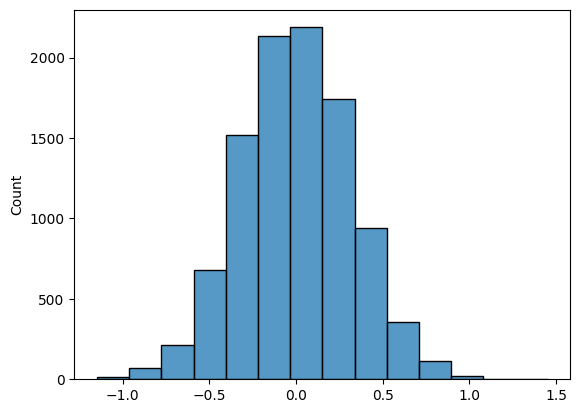

In [11]:
n = 10
numsamples = 10000
xv = np.repeat(0.0,numsamples) # sample means
for j in range(numsamples):
    onesample = np.random.normal(size=n)
    xv[j] = np.mean(onesample)

sns.histplot(xv,bins=14) # create histogram of sample means

xvbar = np.mean(xv) # mean of sample means
xvsd1 = np.std(xv,ddof=1) # standard deviation of sample pmeans

print('xvbar = {:.6f}, mu = {:.1f}, xvsd1 = {:.6f}, sig/sqrt(n) = {:.6f}'.format(xvbar, 0, xvsd1, (1)/np.sqrt(n)))

The CLT for sample means has an important complication compared to the CLT for sample proportions. For proportions, the standard error uses the same proportion $p$:
$ SE = \sqrt{\frac{p(1-p)}{n}} $
whereas for means, standard error $SE = \frac{\sigma}{\sqrt{n}}$ is dependent on the population standard deviation $\sigma$, which is usually unknown and must be estimated. Any estimation is imperfect, so a more spread-out t-distribution is needed, which will be introduced shortly.

There are two conditions required to apply the Central Limit Theorem for a sample mean $x$:

1. **Independence**
The sample observations must be independent. It is satisfied with a simple random sample of size less than 10% of the population, for example.

2. **Normality**
When a sample is **small**, the sample observations must come from a **normally** distributed population. The larger the sample gets, this condition can be **relaxed** more and more. This condition is admittedly more *vague*. For realistic data, especially with smaller sample sizes, there is no good way to check the normality condition. For example, the Figure below is a histogram of 20 randomly chosen numbers from a normal distribution, but it does not look bell-shaped at all.

Two **rules of thumb** are used instead:

2a. If the sample size $n \le 30$ and there are no clear outliers in the data, then it is assumed that the data come from a nearly normal distribution.

2b. If the sample size $n > 30$ and there are no particularly extreme outliers, it is assumed the sampling distribution of $x$ is nearly normal (CLT theorem), even if the underlying individual distribution is not.

For example, consider the Figure below. The sample on the left has $n = 20 < 30$ observations. It does not have any clear outliers (see the left Figure below). There is a peak in the histogram toward the right, but it is not a clear outlier. Thus, the normality condition is met.

On the other hand, the sample on the right has $n = 50 > 30$ observations, but there are particularly extreme outliers, so the normality condition fails (see the right Figure below).

If the actual data is available, there is a Shapiro test to evaluate the normality assumption (low p-value implies a failure of the null hypothesis of normality). The results correspond well with our visual cues. It should be noted, though, that simulations show that the t-test procedure introduced in this chapter is **robust** — not heavily dependent on the normality assumption.

1st data pvalue =  0.24952122569084167
2nd data pvalue =  5.213133036363615e-09


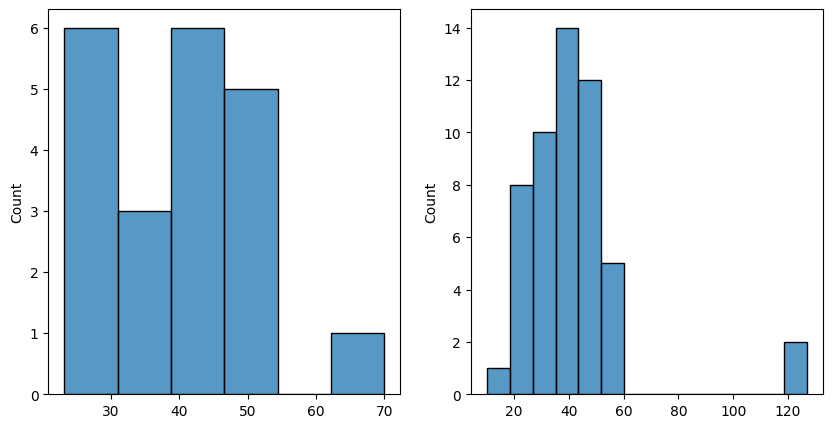

In [14]:
x = [40.93, 40.94, 49.02, 23.93, 48.10, 45.56,
     38.55, 31.83, 23.12, 27.69, 27.34, 51.01,
     42.44, 52.21, 42.30, 36.55, 44.01, 30.51,
     46.71, 24.66, 70]

out1 = shapiro(x)
print('1st data pvalue = ', out1.pvalue)

fig, axs = plt.subplots(1, 2,figsize=(10,5))
sns.histplot(x,ax=axs[0])

x = np.random.normal(loc=40, scale=10, size=50)
x = np.append(x,[125,127])

out1 = shapiro(x)
print('2nd data pvalue = ', out1.pvalue)

sns.histplot(x,ax=axs[1]);

When data is not directly available, we can try to assess the normality and skewness of the data based on experience. For example, consider the bank account distribution. The large majority of accounts would have moderate amounts, while a relatively tiny fraction has amassed millions and billions. Therefore, the distribution is extremely skewed.

On the other hand, test scores tend to be bell-shaped, and we can use the CLT even for smaller sample sizes.

### T-distribution

The Central Limit Theorem above had the true population standard deviation $\sigma$ in the formula for standard error $SE = \frac{\sigma}{\sqrt{n}}$, which is usually unknown.

For the distribution of sample proportions, the unknown true population proportion $p$ was approximated by the sample proportion $\hat{p}$:

$$ SE = \sqrt{\frac{p(1-p)}{n}} \approx \sqrt{\frac{\hat{p}(1-\hat{p})}{n}} $$

Analogously, for sample means, the true population standard deviation $\sigma$ is approximated by the sample standard deviation $s$:

$$ SE = \frac{\sigma}{\sqrt{n}} \approx \frac{s}{\sqrt{n}} $$

$$ s = \sqrt{\frac{\sum (x_i - \bar{x})^2}{n-1}} $$

The sample standard deviation $s$ can estimate the population value $\sigma$ quite accurately for larger sample sizes $n \ge 30$. However, for a smaller sample $n < 30$, this estimate is less precise. In this case, W. Gosset proved that sample means distribution should be modeled by a slightly different **t-distribution**. It is also *symmetric and bell-shaped*, but it is **more spread out (has thicker tails)**. Therefore, observations are more likely to fall beyond 2 standard deviations away from the mean than under the normal distribution.

Much like $\chi^2$, t-distribution is not one, but a family of distributions based on the degree of freedom:

$$ df = n - 1 = (\text{number of observations}) - 1 $$

Several t-distributions (with different degrees of freedom) and the standard normal distribution are shown in the Figure below. As the degree of freedom increases, the t-distributions converge to the standard normal. For $df > 30$, it is almost indistinguishable visually.

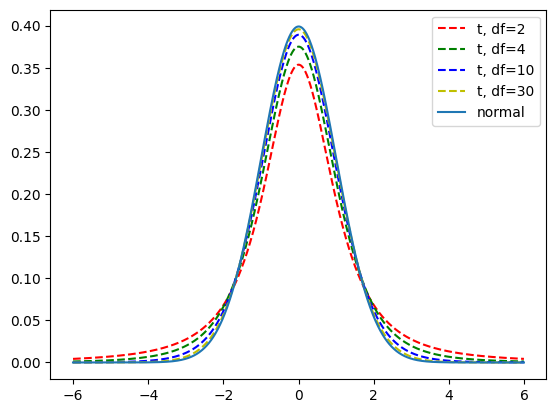

In [17]:
xv = np.arange(-6,6,0.01)

dv = t.pdf(x=xv,df = 2)
plt.plot(xv,dv,'r--',label='t, df=2')

dv = t.pdf(x=xv,df = 4)
plt.plot(xv,dv,'g--',label='t, df=4')

dv = t.pdf(x=xv,df = 10)
plt.plot(xv,dv,'b--',label='t, df=10')

dv = t.pdf(x=xv,df = 30)
plt.plot(xv,dv,'y--',label='t, df=30')

dv = norm.pdf(x=xv)
plt.plot(xv,dv,label='normal')

plt.legend();


The Figure below shows our usual 90%, 95%, and 99% middle areas for confidence intervals on the t-distribution with $df = n - 1 = 10 - 1 = 9$. The overall shape is identical to the standard normal curve, but the critical values are larger and the areas are wider.

   ConfLevel  alpha   tstar
0       0.90   0.10  1.8331
1       0.95   0.05  2.2622
2       0.99   0.01  3.2498 



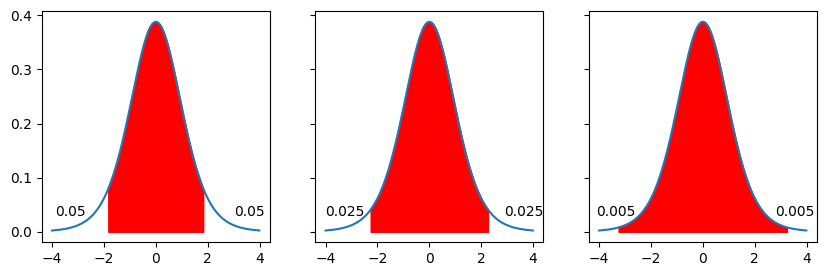

In [18]:
fig, axs = plt.subplots(1, 3, figsize=(10, 3), sharey=True)

df1 = 9 # degree of freedom
xv = np.arange(-4, 4, 0.01)
ConfLevel = np.array([0.9,0.95,0.99])
alpha = 1-ConfLevel
tstar = t.ppf(1-alpha/2,df=df1)

df = pd.DataFrame({'ConfLevel':ConfLevel,'alpha':alpha,'tstar':tstar})

axs[0].plot(xv, t.pdf(xv, df=df1))

px=np.arange(-tstar[0],tstar[0],0.01)
axs[0].fill_between(px,t.pdf(px,df=df1),color='r')
axs[0].text(-3.9,0.03,"0.05")
axs[0].text(3.0,0.03,"0.05")
axs[1].plot(xv, t.pdf(xv,df=df1))

px=np.arange(-tstar[1],tstar[1],0.01)
axs[1].fill_between(px,t.pdf(px,df=df1),color='r')
axs[1].text(-4,0.03,"0.025")
axs[1].text(2.9,0.03,"0.025")
axs[2].plot(xv, t.pdf(xv,df=df1))

px=np.arange(-tstar[2],tstar[2],0.01)
axs[2].fill_between(px,t.pdf(px,df=df1),color='r')
axs[2].text(-4.1,0.03,"0.005")
axs[2].text(2.8,0.03,"0.005")

pd.set_option("display.precision", 4)

print(df,'\n')

### Confidence Interval for One-Sample Mean

In Chapter 5 on proportions, a confidence interval formula for sample proportion was derived, which states that:

$$ \text{point estimate} \pm z^* \times SE = \hat{p} \pm z^* \sqrt{\frac{\hat{p}(1-\hat{p})}{n}} $$

Analogously, the confidence interval for one-sample mean is constructed as:

$$ \text{point estimate} \pm t^:_{df} \times SE = \bar{x} \pm t^*_{df} \frac{s}{\sqrt{n}} $$

where the margin of error is:

$$ \text{Margin of error} = e = t^*_{df} \frac{s}{\sqrt{n}} \implies$$

$$ CI = \bar{x} \pm e $$

**Example**

A random sample of 20 cars was tested for harmful emissions. The mean was 0.174 g/mi with a standard deviation of 0.016 g/mi (min 0.142, max 0.202). Construct 90%, 95%, and 99% confidence intervals. EPA requires that these emissions be no more than 0.165 g/mi. Is this requirement being met?

Since the observations are a simple random sample, independence holds. As the Python code below shows, the min and max observations are within 2.5 standard deviations of the mean, so no extreme outliers. Why 2.5? It is another rule of thumb. For a normal distribution, 95% of the data lies within about 2 standard deviations away from the mean. The t-distribution is somewhat more spread out, so 2.5 is used. Therefore, the normality assumption seems reasonable in this case.

The code below summarizes the steps needed to compute a confidence interval with a given set of significance levels.

In [19]:
def OneMeanCI(xbar,s,n,ConfidenceLevels):
    print('One Mean Confidence Interval function')
    print('Sample mean xbar = ', xbar)
    print('Sample standard deviation = ', s)
    print('Sample size n = ', n)
    print('Confidence Levels',ConfidenceLevels,'\n')

    ConfLevel = np.array(ConfidenceLevels) # confidence level
    alpha = 1-ConfLevel # error level corresponding to confidence level
    print('xbar -+ 2.5*s bounds are {:.4f}, {:.4f}'.format(xbar-2.5*s,xbar+2.5*s))

    SE = s/np.sqrt(n); # standard error for Confidence Interval (CI)
    print('Standard Error = SE = s/sqrt(n) = {:.3f}/sqrt({:d}) = {:.4f}'.format(s,n,SE))

    df1 = n-1
    print('degree of freedom = df1 = {:d}-1 = {:d}\n'.format(n,df1))

    tstar = t.ppf(1-alpha/2,df=df1) # t critical
    MarginErr = tstar*SE # margin of error
    CIL = xbar - MarginErr
    CIR = xbar + MarginErr

    display = pd.DataFrame({'ConfLevel':ConfLevel,'tstar':tstar,'SE':SE, 'MarginErr':MarginErr,'xbar':xbar,'CIL':CIL,'CIR':CIR});
    pd.set_option("display.precision", 4)
    
    print(display,'\n')

    fig, axs = plt.subplots(1, 3, figsize=(10, 3), sharey=True)

    xv = np.arange(-4, 4, 0.01)
    axs[0].plot(xv, t.pdf(xv, df=df1))

    px=np.arange(-tstar[0],tstar[0],0.01)
    axs[0].fill_between(px,t.pdf(px,df=df1),color='r')
    axs[0].text(-3.9,0.03,"0.05")
    axs[0].text(3.0,0.03,"0.05")
    axs[1].plot(xv, t.pdf(xv,df=df1))

    px=np.arange(-tstar[1],tstar[1],0.01)
    axs[1].fill_between(px,t.pdf(px,df=df1),color='r')
    axs[1].text(-4,0.03,"0.025")
    axs[1].text(2.9,0.03,"0.025")
    axs[2].plot(xv, t.pdf(xv,df=df1))

    px=np.arange(-tstar[2],tstar[2],0.01)
    axs[2].fill_between(px,t.pdf(px,df=df1),color='r')
    axs[2].text(-4.1,0.03,"0.005")
    axs[2].text(2.8,0.03,"0.005")

One Mean Confidence Interval function
Sample mean xbar =  0.174
Sample standard deviation =  0.016
Sample size n =  20
Confidence Levels [0.9, 0.95, 0.99] 

xbar -+ 2.5*s bounds are 0.1340, 0.2140
Standard Error = SE = s/sqrt(n) = 0.016/sqrt(20) = 0.0036
degree of freedom = df1 = 20-1 = 19

   ConfLevel   tstar      SE  MarginErr   xbar     CIL     CIR
0       0.90  1.7291  0.0036     0.0062  0.174  0.1678  0.1802
1       0.95  2.0930  0.0036     0.0075  0.174  0.1665  0.1815
2       0.99  2.8609  0.0036     0.0102  0.174  0.1638  0.1842 



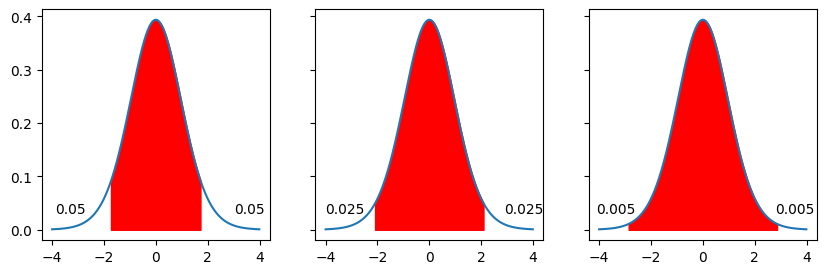

In [ ]:
OneMeanCI(xbar=0.174,s=0.016,n=20,ConfidenceLevels=[0.90,0.95,0.99])

The standard error is:

$ SE = \frac{0.016}{\sqrt{20}} = 0.00358 $

The margin of error is:

$ e = t^* \cdot SE = t^* \cdot 0.00358 $

Then the confidence interval for each level is obtained using:

$ \bar{x} \pm e = 0.174 \pm t^* \cdot 0.00358 $

In this way, we get all the standard-level confidence intervals in the Table above. In addition, the Figure above illustrates these intervals. We are 90% certain that the true mean population emission is between 0.168 and 0.18, 95% between 0.167 and 0.181, and 99% between 0.164 and 0.184. The confidence interval gets wider as the level of confidence increases (same as for proportions).

The most common 95% CI is completely above the EPA required value of 0.165, which implies that the population mean does not meet the pollution standards. Note, however, if we use the 99% level, the CI includes 0.165, so the confidence level is important. Still, to satisfy the EPA standard, we would want the confidence interval to be completely below 0.165.

**Example**

In a test of the effectiveness of garlic in lowering cholesterol levels, 25 randomly selected subjects regularly consumed raw garlic in fixed amounts. The changes in cholesterol levels have a mean of $-1.7$ and a standard deviation of 4.2. The minimum value of this difference was -10.1 and the maximum was 7.9. Construct 90%, 95%, and 99% confidence intervals of the mean net change in LDL cholesterol after the treatment.

The observations are a simple random sample; therefore independence is reasonable. We can assume the data do not suggest any clear outliers, since all observations are within 2.5 standard deviations of the mean. Therefore, the normality assumption seems reasonable.

One Mean Confidence Interval function
Sample mean xbar =  -1.7
Sample standard deviation =  4.2
Sample size n =  25
Confidence Levels [0.9, 0.95, 0.99] 

xbar -+ 2.5*s bounds are -12.2000, 8.8000
Standard Error = SE = s/sqrt(n) = 4.200/sqrt(25) = 0.8400
degree of freedom = df1 = 25-1 = 24

   ConfLevel   tstar    SE  MarginErr  xbar     CIL     CIR
0       0.90  1.7109  0.84     1.4371  -1.7 -3.1371 -0.2629
1       0.95  2.0639  0.84     1.7337  -1.7 -3.4337  0.0337
2       0.99  2.7969  0.84     2.3494  -1.7 -4.0494  0.6494 



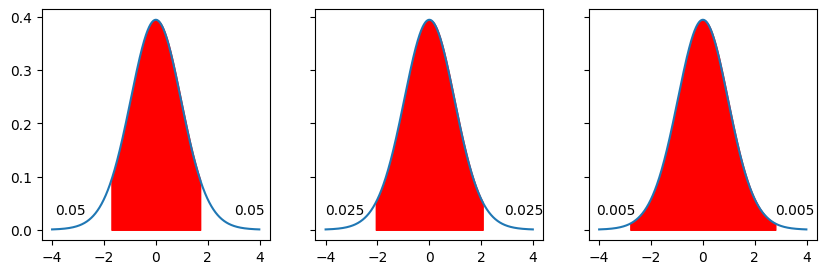

In [21]:
OneMeanCI(xbar=-1.7,s=4.2,n=25,ConfidenceLevels=[0.90,0.95,0.99])

The standard error is:

$ SE = \frac{4.2}{\sqrt{25}} = 0.84 $

The margin of error is:

$ e = t^* \cdot SE = t^* \cdot 0.84 $

Then the confidence interval for each level is obtained using:

$ \bar{x} \pm e = -1.7 \pm t^* \cdot 0.84 $

We are 90% certain that the true mean LDL cholesterol change is between -3.137 and -0.263, 95% certain between -3.434 and 0.034, and 99% certain between -4.049 and 0.649. As the level of confidence increases, the interval gets wider.

The most common 95% CI contains 0 for the difference, which implies that garlic is not effective. Note that if we use a 90% level, the CI is all negative, which would imply an effective reduction in cholesterol. Once again, the choice of the confidence level can be quite important.

### One-Sample Means t-tests

The procedure for one-sample means hypothesis testing is built analogously to one-sample proportions. The null $H_0$ and alternative $H_1$ hypotheses are set first. Then, assuming that $H_0$ is true, the standardized test statistic $t$ is computed, and the p-value (area under the appropriate t-distribution) is found.
The t-statistic formula is analogous to the z-statistic for proportions.
For proportions:

$$ H_0 : p = p_0 $$
$$ SE = \sqrt{\frac{p_0(1 - p_0)}{n}} $$
$$ z = \frac{\text{point estimate} - \text{null value}}{SE} = \frac{\hat{p} - p_0}{SE} $$

Analogously, for one sample mean:

$$ H_0 : \mu = \mu_0 $$
$$ SE = \frac{s}{\sqrt{n}} $$
$$ df = n - 1 $$
$$ t_{df} = \frac{\text{point estimate} - \text{null value}}{SE} = \frac{\bar{x} - \mu_0}{SE} $$

**Example**

A consulting firm claims that its consultants earn on average $150/hour. In a random sample of 24 consultants, the average rate was $127/hour with standard deviation $41/hour (min $100, max $180). Conduct a hypothesis test at 5% level.

$ \bm{H_0} : \mu = 150 $ (**assume true**)

$ \bm{H_1} : \mu \neq 150 $

The hypothesis test seeks to determine if the sample mean $\bar{x} = 127$ is significantly different from the claimed null hypothesis $\mu_0 = 150$.

The code below implements the formulas above in one function. It also shows Cohen’s $d$ computation to be discussed later.

In [23]:
def OneMeanTtest(xbar,s,n,mu0,ConfidenceLevels):
    print('One Mean T test detailed computation')
    print('Sample mean xbar = {:.4f}'.format(xbar))
    print('Sample standard deviation = {:.4f}'.format(s))
    print('Sample size n = {:d}'.format(n))
    print('Null hypothesis claimed mean mu0 = ', mu0)
    print('Confidence Levels',ConfidenceLevels,'\n')
    print('H0: mu = mu0')
    print('H1: mu not mu0 or one-sided test\n')
    print('xbar -+ 2.5*s bounds are {:.4f}, {:.4f}'.format(xbar-2.5*s,xbar+2.5*s))

    SE = s/np.sqrt(n); # standard error for Confidence Interval (CI)
    print('Standard Error = SE = s/sqrt(n) = {:.4f}/sqrt({:d}) = {:.4f}'.format(s,n,SE))

    df1 = n-1; print('degree of freedom = df1 = {:d}-1 = {:d}\n'.format(n,df1))

    meansdiff = xbar - mu0
    print("meansdiff = xbar - mu0 = {:.4f} - {:.4f} = {:.4f}".format(xbar,mu0,meansdiff))

    t1 = meansdiff/SE
    print("test statistic = t1 = meansdiff/SE = {:.4f}/{:.4f} = {:.4f}".format(meansdiff,SE,t1))

    pval2 = 2*(1-t.cdf(np.abs(t1),df=df1)); # 2-sided p-value
    print('P-values=2*(1-t.cdf(np.abs(t1),df=df1)), 2-sided and 1-sided =\n', pval2, pval2/2,'\n')

    CohenD = meansdiff/s
    print("Cohen D = meansdiff/s = {:.4f}/{:.4f} = {:.4f}\n".format(meansdiff,s,CohenD))

    # P-value graphical illustration FYI-----------------------------
    xv = np.arange(-4, 4, 0.001)
    plt.plot(xv, t.pdf(xv,df=df1))

    xL=np.arange(-4,-np.abs(t1),0.001)
    plt.fill_between(xL,t.pdf(xL,df=df1),color='r')

    xR=np.arange(np.abs(t1),4,0.001)
    plt.fill_between(xR,t.pdf(xR,df=df1),color='b')
    #------------------------------------------------------------------

    print('Confidence Interval (CI) approach')

    ConfLevel = np.array(ConfidenceLevels) # confidence level
    alpha = 1-ConfLevel # error level corresponding to confidence level
    print('Critical t = tstar = t.ppf(1-alpha/2,df=df1)')

    tstar = t.ppf(1-alpha/2,df=df1) # tz critical
    print('Margin of error = tstar*SE')

    MarginErr = tstar*SE; # margin of error
    print('CI = xbar +- MarginErr')

    CIL = xbar - MarginErr
    CIR = xbar + MarginErr

    display = pd.DataFrame({'ConfLevel':ConfLevel,'tstar':tstar,'SE':SE, 'MarginErr':MarginErr,'xbar':xbar,'CIL':CIL,'CIR':CIR});
    pd.set_option("display.precision", 4)
    
    print(display,'\n')

One Mean T test detailed computation
Sample mean xbar = 127.0000
Sample standard deviation = 41.0000
Sample size n = 24
Null hypothesis claimed mean mu0 =  150
Confidence Levels [0.9, 0.95, 0.99] 

H0: mu = mu0
H1: mu not mu0 or one-sided test

xbar -+ 2.5*s bounds are 24.5000, 229.5000
Standard Error = SE = s/sqrt(n) = 41.0000/sqrt(24) = 8.3691
degree of freedom = df1 = 24-1 = 23

meansdiff = xbar - mu0 = 127.0000 - 150.0000 = -23.0000
test statistic = t1 = meansdiff/SE = -23.0000/8.3691 = -2.7482
P-values=2*(1-t.cdf(np.abs(t1),df=df1)), 2-sided and 1-sided =
 0.011450910049694007 0.005725455024847004 

Cohen D = meansdiff/s = -23.0000/41.0000 = -0.5610

Confidence Interval (CI) approach
Critical t = tstar = t.ppf(1-alpha/2,df=df1)
Margin of error = tstar*SE
CI = xbar +- MarginErr
   ConfLevel   tstar      SE  MarginErr  xbar       CIL       CIR
0       0.90  1.7139  8.3691    14.3435   127  112.6565  141.3435
1       0.95  2.0687  8.3691    17.3128   127  109.6872  144.3128
2       0

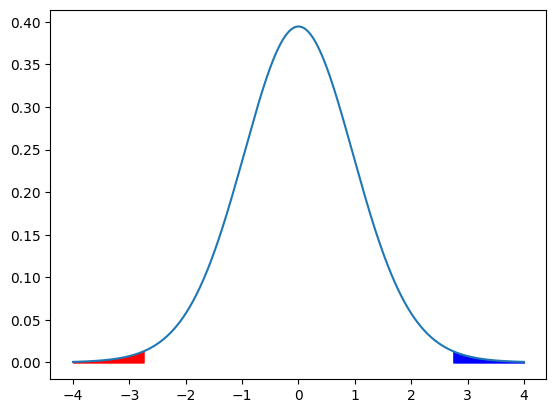

In [24]:
OneMeanTtest(xbar=127,s=41,n=24,mu0=150,ConfidenceLevels=[0.90,0.95,0.99])

The t-test assumptions:
1. Independence is assumed based on a simple random sample.
2. As the code shows, given min and max data values are within 2.5 standard deviations of the mean, so there are no extreme outliers, thus normality can be assumed, and a t-test can be applied. Note also as we mentioned before, the t-test procedure is robust, i.e., not heavily dependent on normality assumption in any case.


Thus, the sampling distribution of $\frac{\bar{x} - \mu_0}{SE}$ (**null distribution**) is t-distribution, where $SE = \frac{s}{\sqrt{n}} = \frac{41}{24} = 8.369$.

The **p-value** is the probability of seeing the observed sample mean $x = 127$ or something even more extreme under our t null distribution shown in the Figure above.

$$t = \frac{\bar{x} - \mu_0}{SE} = \frac{127 - 150}{8.369} = -2.748$$

The alternative $H_1: \mu \neq 150$ is two-sided; therefore both left and right tails must be accounted for. The areas under the tails add up to $p$-value = 0.0114509 < 0.05 = α. Thus, there is enough evidence to reject the initial assumption $H_0: \mu = 150$. The consultants do not make on average $150/hour, it is significantly different. Note, however, that if we used the lower α = 0.01 level, we would *not* be able to reject $H_0$, so the choice of the significance level α is very important.

Using the confidence interval approach, we are 95% confident (for a 5% significance error rate) that the true population mean is between 109.69 and 144.31. This interval does not contain the claimed $H_0: \mu = 150$, confirming the rejection of $H_0$. If the 99% level were used, the CI (103.51, 150.49) would have contained 150 (just barely), resulting in failing to reject $H_0$.

**Example**

When 20 people used a popular diet for one year, their mean weight loss was 2.7 lb and the standard deviation was 6.1 lb (min -8, max 10). Use a 0.01 significance level to test the claim that the mean weight loss is not 0 lb. Based on these results, does the diet appear to be effective?

$\bm{H_0}: \mu = 0$ (**assume true**)

$\bm{H_1}: \mu \neq 0$

The hypothesis test seeks to determine if the sample mean $\bar{x} = 2.7$ is significantly different from the claimed null hypothesis $\mu_0 = 0$.

One Mean T test detailed computation
Sample mean xbar = 2.7000
Sample standard deviation = 6.1000
Sample size n = 20
Null hypothesis claimed mean mu0 =  0
Confidence Levels [0.9, 0.95, 0.99] 

H0: mu = mu0
H1: mu not mu0 or one-sided test

xbar -+ 2.5*s bounds are -12.5500, 17.9500
Standard Error = SE = s/sqrt(n) = 6.1000/sqrt(20) = 1.3640
degree of freedom = df1 = 20-1 = 19

meansdiff = xbar - mu0 = 2.7000 - 0.0000 = 2.7000
test statistic = t1 = meansdiff/SE = 2.7000/1.3640 = 1.9795
P-values=2*(1-t.cdf(np.abs(t1),df=df1)), 2-sided and 1-sided =
 0.06243778951725898 0.03121889475862949 

Cohen D = meansdiff/s = 2.7000/6.1000 = 0.4426

Confidence Interval (CI) approach
Critical t = tstar = t.ppf(1-alpha/2,df=df1)
Margin of error = tstar*SE
CI = xbar +- MarginErr
   ConfLevel   tstar     SE  MarginErr  xbar     CIL     CIR
0       0.90  1.7291  1.364     2.3585   2.7  0.3415  5.0585
1       0.95  2.0930  1.364     2.8549   2.7 -0.1549  5.5549
2       0.99  2.8609  1.364     3.9023   2.7 

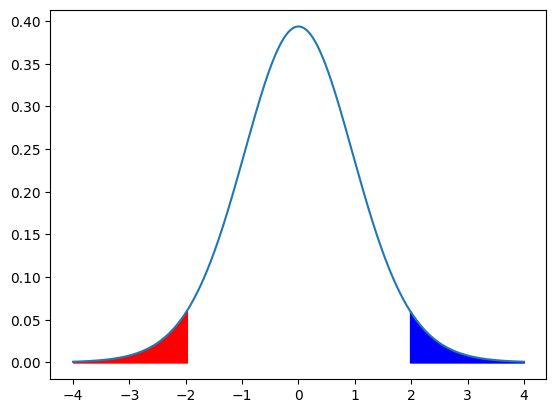

In [25]:
OneMeanTtest(xbar=2.7,s=6.1,n=20,mu0=0,ConfidenceLevels=[0.90,0.95,0.99])

The assumptions for the t-test hold the same way as in the previous problem.
A simple random sample ensures independence. The min/max of the data are within 2.5 standard deviations away from the mean, so no extreme outliers. 

Therefore, the sampling distribution of $\frac{\bar{x} - \mu_0}{SE}$ (**null distribution**) is a t-distribution with $SE = \frac{s}{\sqrt{n}} = \frac{6.1}{20} = 1.364$. The t-test procedure is generally robust to small departures from normality in any case.

The **p-value** is the probability of seeing the observed sample mean $x = 2.7$ or something even more extreme under our t null distribution.

$$t = \frac{\bar{x} - \mu_0}{SE} = \frac{2.7 - 0}{1.364} = 1.979$$

The alternative is two-sided $H_1: \mu \neq 0$, so both tails must be accounted for. The areas under the tails add up to $p$-value = 0.0624378 > 0.01 = α. Thus, we conclude that there is not enough evidence to reject the initial assumption $H_0$. The diet does not seem to be effective.

The conclusion would also stand at the most common α = 0.05 (5%) level, but not at 10%.

Using the confidence interval approach, we are 99% confident (for 1% significance error rate) that the true population mean is between -1.2 and 6.6. This interval contains the claimed $H_0: \mu = 0$, which confirms our conclusion not to reject $H_0$. The 95% CI also contains 0, but not the 90% CI, which confirms our previous observations.

So far we have considered only a two-sided test. Let's investigate some one-sided tests adjusting to lower levels for confidence intervals similar to proportion tests.

**Example**

A company claims to increase students' Math scores to **at least** 70 on the Regents exam. The consumer protection agency is testing their claim. A sample of 20 students is randomly selected and the mean is 65 with the standard deviation of 9. Test the claim at a 5% level.

Because of "**at least**," the alternative is one-sided. Also, because the consumer protection agency is testing their claim, they are trying to refute it, so $H_1$ is opposite to the company's claim.

$\bm{H_0}: \mu = 70$ (**assume true**)

$\bm{H_1}: \mu < 70$

The hypothesis test seeks to determine if the sample mean $\bar{x} = 65$ is significantly **lower** than the claimed null hypothesis $H_0$.

One Mean T test detailed computation
Sample mean xbar = 65.0000
Sample standard deviation = 9.0000
Sample size n = 20
Null hypothesis claimed mean mu0 =  70
Confidence Levels [0.9, 0.95, 0.99] 

H0: mu = mu0
H1: mu not mu0 or one-sided test

xbar -+ 2.5*s bounds are 42.5000, 87.5000
Standard Error = SE = s/sqrt(n) = 9.0000/sqrt(20) = 2.0125
degree of freedom = df1 = 20-1 = 19

meansdiff = xbar - mu0 = 65.0000 - 70.0000 = -5.0000
test statistic = t1 = meansdiff/SE = -5.0000/2.0125 = -2.4845
P-values=2*(1-t.cdf(np.abs(t1),df=df1)), 2-sided and 1-sided =
 0.02246083562915424 0.01123041781457712 

Cohen D = meansdiff/s = -5.0000/9.0000 = -0.5556

Confidence Interval (CI) approach
Critical t = tstar = t.ppf(1-alpha/2,df=df1)
Margin of error = tstar*SE
CI = xbar +- MarginErr
   ConfLevel   tstar      SE  MarginErr  xbar      CIL      CIR
0       0.90  1.7291  2.0125     3.4798    65  61.5202  68.4798
1       0.95  2.0930  2.0125     4.2121    65  60.7879  69.2121
2       0.99  2.8609  2.0125

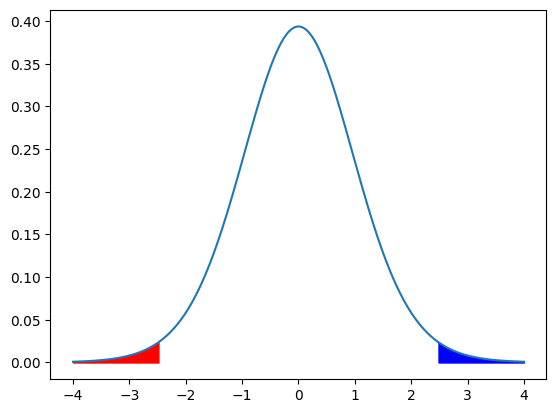

In [26]:
OneMeanTtest(xbar=65,s=9,n=20,mu0=70,ConfidenceLevels=[0.90,0.95,0.99])

The assumptions for the t-test hold. As always, a simple random sample is assumed, which ensures independence. The min/max of the data are not given in this case, but test scores tend to be normally distributed.

TTherefore, the sampling distribution of $\frac{\bar{x} - \mu_0}{SE}$ (**null distribution**) is a t-distribution with $SE = \frac{s}{\sqrt{n}} = \frac{9}{20} = 2.012$. The t-test procedure is generally robust to small departures from normality in any case.

The **p-value** is the probability of seeing the observed sample mean $x = 70$ or something even more extreme under our null distribution.

$$t = \frac{\bar{x} - \mu_0}{SE} = \frac{65 - 70}{2.012} = -2.485$$

The alternative is one-sided to the left $H_1: \mu < 70$, so only the left tail contributes. The area under this tail is the $p$-value = 0.0112304 < 0.05 = α. Therefore, there is enough evidence to reject the initial assumption $H_0: \mu = 65$.

Once again, for the one-sided test, we have to use $1 - 2\alpha = 1 - 2 \cdot 0.05 = 0.90$ confidence level. Therefore, we are 90% confident (10% significance error) that the true population mean is between 61.52 and 68.48, which does not contain the claimed $H_0: \mu = 70$, confirming our conclusion to reject $H_0$.

In an argument similar to the case of the proportion, any sample mean $\bar{x}$ above 70 already invalidates $H_1: \mu < 70$, and there is no reason to continue to test such an alternative. The consumer protection agency has no case against the company. Moreover, even if the sample mean $\bar{x}$ is below 70, it must be small enough to be significantly below 70 to reject $H_0$. In the case above it was, but the code below shows the same calculation for $\bar{x} = 68$, which is not low enough, resulting in a $p$-value above 0.05 and failure to reject $H_0$.

One Mean T test detailed computation
Sample mean xbar = 68.0000
Sample standard deviation = 9.0000
Sample size n = 20
Null hypothesis claimed mean mu0 =  70
Confidence Levels [0.9, 0.95, 0.99] 

H0: mu = mu0
H1: mu not mu0 or one-sided test

xbar -+ 2.5*s bounds are 45.5000, 90.5000
Standard Error = SE = s/sqrt(n) = 9.0000/sqrt(20) = 2.0125
degree of freedom = df1 = 20-1 = 19

meansdiff = xbar - mu0 = 68.0000 - 70.0000 = -2.0000
test statistic = t1 = meansdiff/SE = -2.0000/2.0125 = -0.9938
P-values=2*(1-t.cdf(np.abs(t1),df=df1)), 2-sided and 1-sided =
 0.3328052573100222 0.1664026286550111 

Cohen D = meansdiff/s = -2.0000/9.0000 = -0.2222

Confidence Interval (CI) approach
Critical t = tstar = t.ppf(1-alpha/2,df=df1)
Margin of error = tstar*SE
CI = xbar +- MarginErr
   ConfLevel   tstar      SE  MarginErr  xbar      CIL      CIR
0       0.90  1.7291  2.0125     3.4798    68  64.5202  71.4798
1       0.95  2.0930  2.0125     4.2121    68  63.7879  72.2121
2       0.99  2.8609  2.0125  

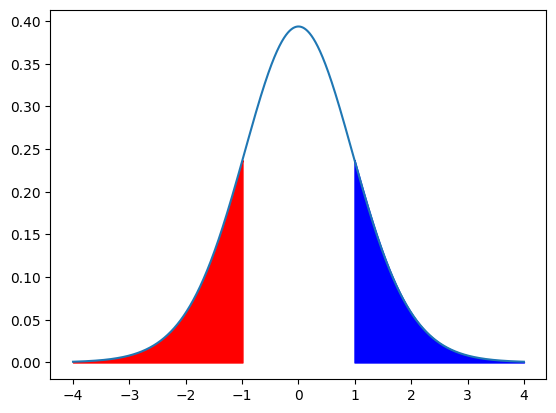

In [27]:
OneMeanTtest(xbar=68,s=9,n=20,mu0=70,ConfidenceLevels=[0.90,0.95,0.99])

**Example**

A water bottle company claims that there is **at most** 1 ppm (part per million) of arsenic in their bottled water. A consumer agency is set to test this claim. A random sample of 25 bottles was collected, and the mean concentration of arsenic was 1.09 with the standard deviation of 0.24 (min 0.9, max 1.37). Test the claim at 5%.

Because of the "**at most**" claim, the alternative is one-sided. Also, because the consumer protection agency is testing their claim, they are trying to refute it, so the alternative is opposite to the company's claim.

$\bm{H_0}: \mu = 1$ (**assume true**)

$\bm{H_1}: \mu > 1$

The hypothesis test seeks to determine if the sample mean $\bar{x} = 1.09$ is significantly higher than the claimed null hypothesis $H_0$.

One Mean T test detailed computation
Sample mean xbar = 1.0900
Sample standard deviation = 0.2400
Sample size n = 25
Null hypothesis claimed mean mu0 =  1
Confidence Levels [0.9, 0.95, 0.99] 

H0: mu = mu0
H1: mu not mu0 or one-sided test

xbar -+ 2.5*s bounds are 0.4900, 1.6900
Standard Error = SE = s/sqrt(n) = 0.2400/sqrt(25) = 0.0480
degree of freedom = df1 = 25-1 = 24

meansdiff = xbar - mu0 = 1.0900 - 1.0000 = 0.0900
test statistic = t1 = meansdiff/SE = 0.0900/0.0480 = 1.8750
P-values=2*(1-t.cdf(np.abs(t1),df=df1)), 2-sided and 1-sided =
 0.07301263858883189 0.036506319294415945 

Cohen D = meansdiff/s = 0.0900/0.2400 = 0.3750

Confidence Interval (CI) approach
Critical t = tstar = t.ppf(1-alpha/2,df=df1)
Margin of error = tstar*SE
CI = xbar +- MarginErr
   ConfLevel   tstar     SE  MarginErr  xbar     CIL     CIR
0       0.90  1.7109  0.048     0.0821  1.09  1.0079  1.1721
1       0.95  2.0639  0.048     0.0991  1.09  0.9909  1.1891
2       0.99  2.7969  0.048     0.1343  1.09  0

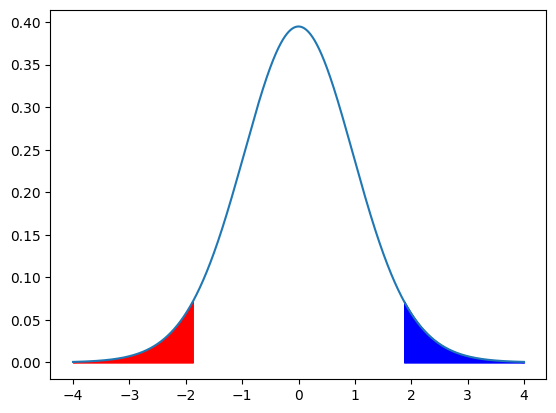

In [28]:
OneMeanTtest(xbar=1.09,s=0.24,n=25,mu0=1,ConfidenceLevels=[0.90,0.95,0.99])

The assumptions for the t-test hold — independent observations and min/max of the data are within 2.5 standard deviations away from the mean, so no extreme outliers.

Therefore, the sampling distribution of $\frac{\bar{x} - \mu_0}{SE}$ (**null distribution**) is a t-distribution with $SE = \frac{s}{\sqrt{n}} = \frac{0.24}{25} = 0.048$.

The **p-value** is the probability of seeing the observed sample mean $x$ or something even more extreme under our t null distribution.

$$t = \frac{\bar{x} - \mu_0}{SE} = \frac{1.09 - 1}{0.048} = \frac{0.09}{0.048} = 1.875$$

The alternative is one-sided to the right $H_1: \mu > 1$, so only the right tail is included, which gives $p$-value = 0.0365063 < 0.05 = α. Therefore, there is enough evidence to reject the initial assumption $H_0: \mu = 1$. Thus, the mean concentration of arsenic in the company's water bottles is significantly higher than 1.
Note that if we used a two-sided test in this case, the $p$-value = 0.0730126 > 0.05 = α, which would lead to failing to reject $H_0$. Once again, it is important to follow the given hypothesis direction.

Yet again, for the one-sided test, the confidence level is adjusted to $1 - 2\alpha = 1 - 2 \cdot 0.05 = 0.90$. Thus, we are 90% confident (10% significance error) that the true population mean is between 1.01 and 1.17, which does NOT contain the claimed $H_0: \mu = 1$. This confirms our conclusion to reject $H_0$.
If we wrongly used a 95% confidence interval of 0.99 to 1.19, the conclusion would have been the opposite.

### One-Sample Means Tests on Data Files

In this section, we will work on actual data, not just data summaries (mean, standard deviations, etc.) as in previous examples.

Before we start with examples, let's remark that even though the t-test is quite robust to departures from normality, in more extreme cases, a non-parametric **Wilcoxon** signed-rank test is an essential alternative. It uses data ranks rather than actual values. Ranks are resistant to outliers and skewness, making this test a better choice for small, skewed samples. It can be used, for example, to determine whether the center location of the sample (mean or median) is equal to the prescribed value. Generally, non-parametric procedures have less power to reject $H_0$ when it is false than the corresponding parametric procedure if the normality assumption holds. When data is available, we will employ both t-test and Wilcoxon tests and compare the results.

**Example**

The greenhouse gas CO2 emissions is a very serious issue for the environment. Assume we are given that last year the CO2 emission in a country was 3.26 metric tons per capita. The data below gives a random sample of CO2 emissions this year. At the 1% level, is there enough evidence to show that the mean CO2 emissions level is lower this year?

The problem asks for lower emissions; therefore the alternative is one-sided:

$\bm{H_0}: \mu = 3.26$ (**assume true**)

$\bm{H_1}: \mu < 3.26$

The hypothesis test seeks to determine if the sample mean $x = 3.092$ is significantly lower than the claimed null hypothesis $H_0$.

This time, the actual data are given, so we first consider the histogram and boxplot of the data in the code below, as well as the `stats.ttest_1samp()` function to perform the t-test. In addition, `scipy.stats.wilcoxon` function is used to run the Wilcoxon test on the data. Note that it takes the difference `mydata.x-3.26` as the input. In both tests, we have to remember to specify `alternative = "less"` to compute the left-tail test; otherwise a two-sided alternative is done automatically. A step-by-step code is used as well.

Python Ttest_1sampResult built in function
Ttest_1sampResult(statistic=-2.7983729360306717, pvalue=0.007538301009340417) 

Python non-parametric Wilcoxon built in function
WilcoxonResult(statistic=11.0, pvalue=0.00335693359375) 

One Mean T test detailed computation
Sample mean xbar = 3.0929
Sample standard deviation = 0.2235
Sample size n = 14
Null hypothesis claimed mean mu0 =  3.26
Confidence Levels [0.9, 0.95, 0.98, 0.99] 

H0: mu = mu0
H1: mu not mu0 or one-sided test

xbar -+ 2.5*s bounds are 2.5341, 3.6516
Standard Error = SE = s/sqrt(n) = 0.2235/sqrt(14) = 0.0597
degree of freedom = df1 = 14-1 = 13

meansdiff = xbar - mu0 = 3.0929 - 3.2600 = -0.1671
test statistic = t1 = meansdiff/SE = -0.1671/0.0597 = -2.7984
P-values=2*(1-t.cdf(np.abs(t1),df=df1)), 2-sided and 1-sided =
 0.015076602018680774 0.007538301009340387 

Cohen D = meansdiff/s = -0.1671/0.2235 = -0.7479

Confidence Interval (CI) approach
Critical t = tstar = t.ppf(1-alpha/2,df=df1)
Margin of error = tstar*SE
CI = xba

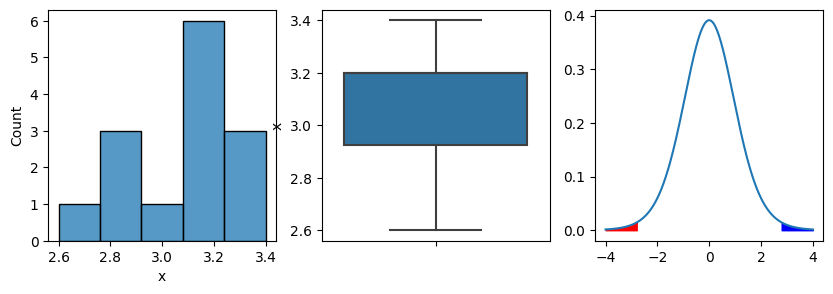

In [30]:
mydata = pd.DataFrame({'x':[3.2, 3.4, 3.2, 3.2, 2.8, 3.3, 2.9, 3.2, 2.6, 3.2, 2.9, 3.0, 3.1, 3.3]})

xbar1 = np.mean(mydata.x)
s1 = np.std(mydata.x,ddof=1)
n1 = len(mydata.x)

fig, axs = plt.subplots(1, 3, figsize=(10, 3))
sns.histplot(data=mydata,x="x", ax=axs[0])
sns.boxplot(data=mydata,y="x", ax=axs[1])

print('Python Ttest_1sampResult built in function')
print(stats.ttest_1samp(mydata.x, popmean=3.26, alternative='less'),'\n')

print('Python non-parametric Wilcoxon built in function')
print(wilcoxon(mydata.x-3.26, alternative='less'),'\n')# differences

OneMeanTtest(xbar=xbar1,s=s1,n=n1,mu0=3.26,ConfidenceLevels=[0.90,0.95,0.98, 0.99])

As always, a simple random sample is assumed, which ensures independence. The histogram and boxplot above show no extreme outliers, so assumptions of normality are not violated. Thus, the assumptions for the t-test hold.

Therefore, the sampling distribution of $\frac{\bar{x} - \mu_0}{SE}$ (**null distribution**) is t-distribution with $SE = \frac{s}{\sqrt{n}} = \frac{0.223}{\sqrt{14}} = 0.06$.

The **p-value** is the probability of seeing the observed sample mean $x = 3.093$ or something even more extreme under our t null distribution.

$$t = \frac{\bar{x} - \mu_0}{SE} = \frac{3.093 - 3.26}{0.06} = -2.798$$

The alternative is one-sided to the left $H_1: \mu < 3.26$, so only the left tail area contributes to the $p$-value = 0.0075383 < 0.01 = α. Therefore, there is enough evidence to reject $H_0: \mu = 3.26$. Note that if we had used a two-sided test in this case, $p$-value = 0.0150766 > 0.01 = α, so we would have failed to reject $H_0$. Note also that the non-parametric Wilcoxon test leads to the same conclusions.

Once again, for the one-sided test, we have to use $1 - 2\alpha = 1 - 2 \cdot 0.01 = 0.98$ confidence level. Thus, we are 98% confident (2% significance error) that the true population mean is between 2.93 and 3.25, which does not contain the claimed $H_0: \mu = 3.26$. This confirms our conclusion to reject $H_0$. If we wrongly used a 99% confidence interval (2.91, 3.27), the opposite conclusion would have resulted.

**Example**

A new experimental reading technique was tried on 16 elementary school children. Their reading scores are given below. Is there enough evidence to show that the mean score is **higher** than the State requirement of 65? Test at the 10% level.

Note that we are checking if the mean score is **higher** than the State requirement, so the alternative is one-sided. Also, we are not trying to refute the claim, just checking if it is higher, so the alternative is greater than 65.

$\bm{H_0}: \mu = 65$ (**assume true**)

$\bm{H_1}: \mu > 65$

The hypothesis test seeks to determine if the sample mean $x = 72.938$ is significantly higher than the claimed null hypothesis $H_0$.

The actual data are given once again, so a histogram and a boxplot are used to check for extreme skewness and/or outliers. Note again that `alternative="greater"` must be used to ensure the correct one-sided test.

Python Ttest_1sampResult built in function
Ttest_1sampResult(statistic=1.5797600352187966, pvalue=0.06750718602179727) 

Python non-parametric Wilcoxon built-in function
WilcoxonResult(statistic=93.5, pvalue=0.105712890625) 

One Mean T test detailed computation
Sample mean xbar = 72.9375
Sample standard deviation = 20.0980
Sample size n = 16
Null hypothesis claimed mean mu0 =  65
Confidence Levels [0.8, 0.9, 0.95, 0.99] 

H0: mu = mu0
H1: mu not mu0 or one-sided test

xbar -+ 2.5*s bounds are 22.6925, 123.1825
Standard Error = SE = s/sqrt(n) = 20.0980/sqrt(16) = 5.0245
degree of freedom = df1 = 16-1 = 15

meansdiff = xbar - mu0 = 72.9375 - 65.0000 = 7.9375
test statistic = t1 = meansdiff/SE = 7.9375/5.0245 = 1.5798
P-values=2*(1-t.cdf(np.abs(t1),df=df1)), 2-sided and 1-sided =
 0.13501437204359457 0.06750718602179728 

Cohen D = meansdiff/s = 7.9375/20.0980 = 0.3949

Confidence Interval (CI) approach
Critical t = tstar = t.ppf(1-alpha/2,df=df1)
Margin of error = tstar*SE
CI = xbar +- 

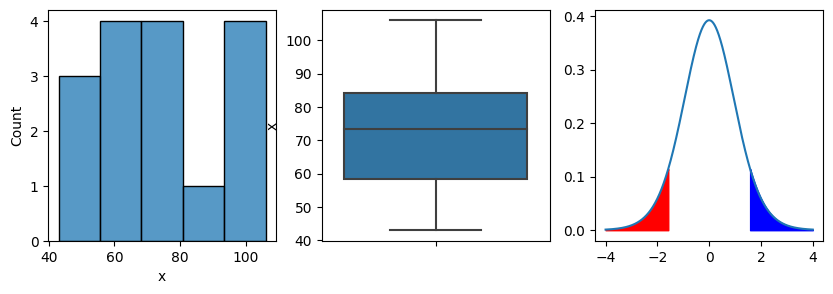

In [31]:
mydata = pd.DataFrame({'x':[72,53,64,100,45,56,75,94,59,43,104,75,81,63,106,77]})

xbar1 = np.mean(mydata.x) # sample mean
s1 = np.std(mydata.x,ddof=1) # sample standard deviation
n1 = len(mydata.x) # sample size

fig, axs = plt.subplots(1, 3, figsize=(10, 3))
sns.histplot(data=mydata,x="x", ax=axs[0])
sns.boxplot(data=mydata,y="x", ax=axs[1])

print('Python Ttest_1sampResult built in function')
print(stats.ttest_1samp(mydata.x, popmean=65, alternative='greater'),'\n')

print('Python non-parametric Wilcoxon built-in function')
print(wilcoxon(mydata.x-65, alternative='greater'),'\n') # differences!

OneMeanTtest(xbar=xbar1,s=s1,n=n1,mu0=65,ConfidenceLevels=[0.80,0.90,0.95,0.99])

As always, a simple random sample is assumed, which ensures independence. The histogram and boxplot above show no extreme outliers, so assumptions of normality are not violated. Thus, the assumptions for the t-test hold (the t-test is robust against small departures from normality in any case).

Therefore, according to the CLT, the sampling distribution of $\frac{\bar{x} - \mu_0}{SE}$ (**null distribution**) is t-distribution with $SE = \frac{s}{\sqrt{n}} = \frac{20.098}{\sqrt{16}} = 5.024$.

The **p-value** is the probability to see the observed sample mean $x = 72.938$ or something even more extreme under our t null distribution.

$$t = \frac{\bar{x} - \mu_0}{SE} = \frac{72.938 - 65}{5.024} = 1.58$$

The alternative is one-sided to the right $H_1: \mu > 65$, so only the right tail contributes. The area under this tail is the $p$-value = 0.0675072 < 0.10 = α, so we conclude that there is enough evidence to reject the initial assumption $H_0: \mu = 65$ at 10%. At the more usual 5% level, we would have failed to reject $H_0$. Also, if we had used a two-sided test, $p$-value = 0.1350144 > 0.10 = α, we would have failed to reject $H_0$ as well. Note also that the non-parametric Wilcoxon test leads to the opposite conclusion — its $p$-value is slightly above α = 0.10. Which one to follow here? The boxplot is rather symmetric; therefore the t-test seems to be reliable. As mentioned before, a non-parametric test tends to be less powerful in rejecting the null hypothesis.

For the one-sided test, we have to use $1 - 2\alpha = 1 - 2 \cdot 0.10 = 0.80$ confidence level since CI is two-sided. Thus, we are 80% confident (20% significance error) that the true population mean is between 66.2 and 79.67, which does not contain the claimed $H_0: \mu = 65$. This confirms our conclusion to reject $H_0$. If we wrongly used a 90% confidence interval (64.13, 81.75), the conclusion would have been opposite.

**Example**

Consider again the `HELPrct.csv` file and concentrate on the depression CESD score. Let's say, for the general population, the mean score is around 30. Investigate if it is different for this sample of substance abusers. Use 5% level of significance.

$\bm{H_0}: \mu = 30$ (**assume true**)

$\bm{H_1}: \mu \neq 30$

The hypothesis test seeks to determine if the sample mean $x = 32.848$ is significantly different from the claimed null hypothesis $H_0$.

The code is a bit different — `HELPrct.csv` data file must be loaded and we reference variable `cesd`.

Python Ttest_1sampResult built in function
Ttest_1sampResult(statistic=4.843156493027925, pvalue=1.7582140620493572e-06) 

Python non-parametric Wilcoxon built-in function
WilcoxonResult(statistic=35171.5, pvalue=8.075719421734236e-07) 

One Mean T test detailed computation
Sample mean xbar = 32.8477
Sample standard deviation = 12.5145
Sample size n = 453
Null hypothesis claimed mean mu0 =  30
Confidence Levels [0.9, 0.95, 0.99] 

H0: mu = mu0
H1: mu not mu0 or one-sided test

xbar -+ 2.5*s bounds are 1.5615, 64.1338
Standard Error = SE = s/sqrt(n) = 12.5145/sqrt(453) = 0.5880
degree of freedom = df1 = 453-1 = 452

meansdiff = xbar - mu0 = 32.8477 - 30.0000 = 2.8477
test statistic = t1 = meansdiff/SE = 2.8477/0.5880 = 4.8432
P-values=2*(1-t.cdf(np.abs(t1),df=df1)), 2-sided and 1-sided =
 1.758214062119734e-06 8.79107031059867e-07 

Cohen D = meansdiff/s = 2.8477/12.5145 = 0.2276

Confidence Interval (CI) approach
Critical t = tstar = t.ppf(1-alpha/2,df=df1)
Margin of error = tstar*SE
C

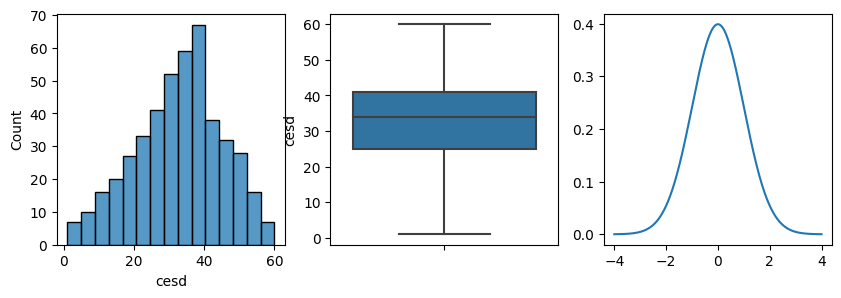

In [32]:
url=f'{base_path}/HELPrct.csv'
mydata = pd.read_csv(url) # save as mydata file

xbar1 = np.mean(mydata.cesd) # sample mean
s1 = np.std(mydata.cesd,ddof=1) # sample standard deviation
n1 = len(mydata.cesd) # sample size

fig, axs = plt.subplots(1, 3, figsize=(10, 3))
sns.histplot(data=mydata,x="cesd", ax=axs[0])
sns.boxplot(data=mydata,y="cesd", ax=axs[1])

print('Python Ttest_1sampResult built in function')
print(stats.ttest_1samp(mydata.cesd, popmean=30),'\n')

print('Python non-parametric Wilcoxon built-in function')
print(wilcoxon(mydata.cesd-30),'\n') # note differences!

OneMeanTtest(xbar=xbar1,s=s1,n=n1,mu0=30,ConfidenceLevels=[0.90,0.95,0.99])

We can assume these patients are a simple random sample of all such patients, so they are independent. The histogram and boxplot above are almost perfectly bell-shaped (normally distributed). Thus, the assumptions for the t-test hold well in this case (the t-test is robust against such departures anyway).

Therefore, according to the CLT, the sampling distribution of $\frac{\bar{x} - \mu_0}{SE}$ (**null distribution**) is t-distribution with $SE = \frac{s}{\sqrt{n}} = \frac{12.514}{\sqrt{453}} = 0.588$.

The **p-value** is the probability of seeing the observed sample mean $x = 32.848$ or something even more extreme under our t null distribution.

$$t = \frac{\bar{x} - \mu_0}{SE} = \frac{32.848 - 30}{0.588} = 4.843$$

We are back to two-sided $H_1$, so both left and right tails must be accounted for. These tails in the t-distribution are shown in the Figure above, but they are too small to see visually. The areas under the tails add up to $p$-value = $1.758 \cdot 10^{-6} < 0.05 = \alpha$, so we conclude that there is enough evidence to reject the initial assumption $H_0$. Thus, the mean population depression score for these substance abusers is not 30. Note also that the non-parametric Wilcoxon test leads to the same conclusions.

Using the confidence interval approach, we are 95% confident (for 5% significance error rate) that the true population mean is between 31.69 and 34, which does not contain the claimed $H_0: \mu = 30$. This confirms our conclusion to reject $H_0$.

**Example**

Consider the `HELPrct.csv` file again and concentrate on the mental health MCS score. From previous studies of substance abusers, the average MCS score is around 32. Investigate if it is different for this sample of substance abusers. Conduct a hypothesis test at a 5% level.

$\bm{H_0}: \mu = 32$ (**assume true**)

$\bm{H_1}: \mu \neq 32$

The hypothesis test seeks to determine if the sample mean $x = 31.677$ is significantly different from the claimed null hypothesis $H_0$.

Python Ttest_1sampResult built in function
Ttest_1sampResult(statistic=-0.5359710658721357, pvalue=0.5922421917489025) 

Python non-parametric Wilcoxon built-in function
WilcoxonResult(statistic=47638.0, pvalue=0.17542737066915193) 

One Mean T test detailed computation
Sample mean xbar = 31.6767
Sample standard deviation = 12.8393
Sample size n = 453
Null hypothesis claimed mean mu0 =  32
Confidence Levels [0.9, 0.95, 0.99] 

H0: mu = mu0
H1: mu not mu0 or one-sided test

xbar -+ 2.5*s bounds are -0.4217, 63.7750
Standard Error = SE = s/sqrt(n) = 12.8393/sqrt(453) = 0.6032
degree of freedom = df1 = 453-1 = 452

meansdiff = xbar - mu0 = 31.6767 - 32.0000 = -0.3233
test statistic = t1 = meansdiff/SE = -0.3233/0.6032 = -0.5360
P-values=2*(1-t.cdf(np.abs(t1),df=df1)), 2-sided and 1-sided =
 0.5922421917489022 0.2961210958744511 

Cohen D = meansdiff/s = -0.3233/12.8393 = -0.0252

Confidence Interval (CI) approach
Critical t = tstar = t.ppf(1-alpha/2,df=df1)
Margin of error = tstar*SE
CI =

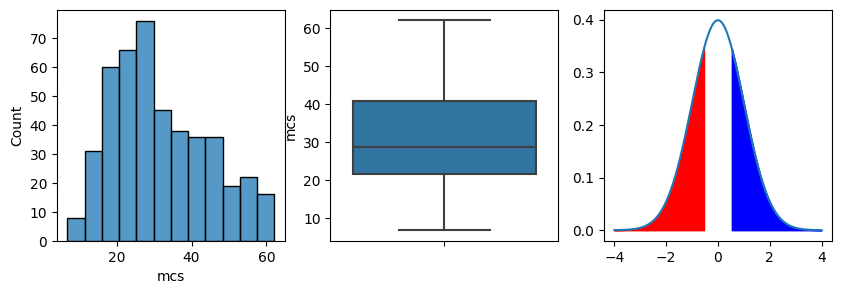

In [33]:
url=f'{base_path}/HELPrct.csv'
mydata = pd.read_csv(url) # save as mydata file

xbar1 = np.mean(mydata.mcs) # sample mean
s1 = np.std(mydata.mcs,ddof=1) # sample standard deviation
n1 = len(mydata.mcs) # sample size

fig, axs = plt.subplots(1, 3, figsize=(10, 3))
sns.histplot(data=mydata,x="mcs", ax=axs[0])
sns.boxplot(data=mydata,y="mcs", ax=axs[1])

print('Python Ttest_1sampResult built in function')
print(stats.ttest_1samp(mydata.mcs, popmean=32),'\n')

print('Python non-parametric Wilcoxon built-in function')
print(wilcoxon(mydata.mcs-32),'\n') # note differences!

OneMeanTtest(xbar=xbar1,s=s1,n=n1,mu0=32,ConfidenceLevels=[0.90,0.95,0.99])

Same as in the previous problem, t-test assumptions hold. Even though the distribution of `mcs` scores is a bit skewed right, the sample is so large that the distribution of sample means is normal in any case by the Central Limit Theorem.

Therefore, the sampling distribution of $\frac{\bar{x} - \mu_0}{SE}$ (**null distribution**) is t-distribution with $SE = \frac{s}{\sqrt{n}} = \frac{12.839}{\sqrt{453}} = 0.603$.

The **p-value** is the probability of seeing the observed sample mean $\bar{x} = 31.677$ or something even more extreme under the t-distribution.

$$t = \frac{\bar{x} - \mu_0}{SE} = \frac{31.677 - 32}{0.603} = -0.536$$

The alternative $H_1$ is two-sided, so both left and right tails need to be accounted for. The areas under the tails add up to $p$-value = 0.5922422 > 0.05 = α, so we conclude that there is not enough evidence to reject the initial assumption $H_0$. Thus, this sample gives no reason to doubt that the mean population MCS mental score for these substance abusers is 32. Note also that the non-parametric Wilcoxon test leads to the same conclusions.

Also, we are 95% confident (5% significance error) that the true population mean is between 30.49 and 32.86, which contains the claimed $H_0: \mu = 32$. This confirms our conclusion *not* to reject $H_0$.

### Choosing a Sample Size When Estimating a Mean

Analogous to proportions, let's investigate how large a sample size $n$ should be to achieve a certain desired accuracy (given the margin of error $e$). First, let's solve the formula of the margin of error for $n$:

$$ x \pm t^* \cdot SE \ \text{Margin of error} = e = t^* \cdot SE = t^* \cdot \frac{s}{\sqrt{n}} \implies \sqrt{n} $$

$$ = \frac{t^* \cdot s}{e} \implies n = \left(\frac{t^* s}{e}\right)^2 $$

Unlike proportions computation, there is an additional complication, though. The critical $t^*$ requires knowledge of the degree of freedom $df = n-1$ while $n$ is being actually computed. In practice, $t^*$ is replaced with $z^*$ from the standard normal distribution. Strictly speaking, this substitution is really valid only for $n \ge 30$ when the t-distribution is almost indistinguishable from the standard normal.

Thus, we obtain an estimate:

$$ n = \left(\frac{z^* s}{e}\right)^2 $$

**Example**

What sample size is needed to estimate the mean height for a population of adults in the United States? Assume that we want to be 95% confident that the sample mean is within 0.2 in of the population mean with a standard deviation of 3 in.

In [34]:
e = 0.2
s = 3
alpha = 0.05

zstar = norm.ppf(1-alpha/2)
print('e = {:.4f}, alpha = {:.2f}, zstar = = {:.4f}'.format(e,alpha,zstar))

n = (zstar*s/e)**2
print('The number of people needed for the study = n = {:.2f}'.format(n))

e = 0.2000, alpha = 0.05, zstar = = 1.9600
The number of people needed for the study = n = 864.33


As always, the estimate is rounded up, so you would need 865 subjects in the study to achieve the desired accuracy.

The estimate's dependence on $z^*$ and $e$ is the same as for the sample size in the proportion test - $n = \frac{(z^*)^2 p(1-p)}{e^2}$. First, it is directly proportional to $(z^*)^2$, so as the level of confidence increases $0.90 \to 0.95 \to 0.99$, $z^*$ increases, and the resulting $n$ increases. Conversely, as the margin of error $e$ increases (lower accuracy), $n$ decreases.
Let's illustrate it with a modification of the above example to compute $n$ for several confidence levels and several margins of error.

In [35]:
e = 0.2
s = 3
ConfLevel = np.array([0.90,0.95,0.99]) # confidence levels
alpha = 1-ConfLevel # corresponding error levels

zstar = norm.ppf(1-alpha/2)
# print('e, alpha, zstar = ', e, alpha, zstar)

n = (zstar*s/e)**2

df = pd.DataFrame({'ConfLevel':ConfLevel,'alpha':alpha,'zstar':zstar,'n':n})
pd.set_option("display.precision", 4)

print(df,'\n')


   ConfLevel  alpha   zstar          n
0       0.90   0.10  1.6449   608.7473
1       0.95   0.05  1.9600   864.3282
2       0.99   0.01  2.5758  1492.8517 



In [36]:
e = np.array([0.1,0.2,0.3])
s = 3
ConfLevel = 0.95 # confidence levels
alpha = 1-ConfLevel # corresponding error levels

zstar = norm.ppf(1-alpha/2)
# print('e, alpha, zstar = ', e, alpha, zstar)

n = (zstar*s/e)**2

df = pd.DataFrame({'ConfLevel':ConfLevel,'zstar':zstar,'e':e,'n':n})
pd.set_option("display.precision", 4)

print(df,'\n')

   ConfLevel  zstar    e          n
0       0.95   1.96  0.1  3457.3129
1       0.95   1.96  0.2   864.3282
2       0.95   1.96  0.3   384.1459 



### Effect Size and Power

Although the hypothesis testing approach is used very widely, there are serious issues with it. One is that a lot of attention is given to obtaining a p-value below 0.05, rather than focusing on the strength of the effect in the population. The p-value is directly related to sample size. As the sample size increases, the standard error $SE = \frac{s}{\sqrt{n}}$ decreases and $t = \frac{\bar{x}-\mu_0}{SE}$ increases, therefore p-value (area beyond $t$) decreases. Thus, it is more likely to reject a null hypothesis for large samples.

Therefore, we should focus not only on the p-value but also on the actual strength of the effect that we are investigating—**effect size**. More precisely, it is a standardized difference between observed and claimed value or between two or more groups.

For one-sample means test studied in the previous sections, Cohen defined effect size to be:

$$ d = \frac{\bar{x} - \mu_0}{s} $$

which is essentially the $t$ or $z$ of $x$ based on the original standard deviation $s$, not standard error $SE = \frac{s}{\sqrt{n}}$. He also introduced guidelines on what constitutes a small, medium, or large effect: small ($d = 0.2$), medium ($d = 0.5$), and large ($d = 0.8$).

Another criticism is that too much focus is on the probability of making a Type I error (rejecting $H_0$ when it is actually true) and not enough attention is given to the Type II error (not rejecting $H_0$ when it is actually false). Ideally, we need a method sensitive enough to detect real effects in the underlying population, which is measured by the **statistical power (probability to reject $H_0$ when it is actually false—the complement of Type II error)**. A reasonable level of power is 0.80–0.90, which translates into 80%-90% probability of finding the effect if it exists in the population.
Power is influenced by a number of factors:
1. Sample size - a larger sample increases the power.
2. Effect size - a bigger effect increases the power (big effect is easier to detect).
3. The criterion for significance error $\alpha$ (Type I error probability) is usually set at 0.05. Reducing $\alpha$ to 0.01, say, will make it harder to reject $H_0$ when it is true, but also when it is false, and power decreases. Increasing $\alpha$ to 0.10, say, will make it easier to reject $H_0$ when it is true, but also when it is false, and the power increases.
4. Whether you have a one- or two-tailed hypothesis, one-tailed statistical tests tend to be more powerful than two-tailed tests.

If we failed to reject the null hypothesis, it can be argued that there is no effect to detect in the population. If, however, the study was underpowered (e.g., small sample), then we don't know if the null was accepted correctly or whether it was a Type II error.

The code below shows that given any three of the sample size ($n$), probability of Type I error ($\alpha$), effect size ($d$), and power, the fourth one can be found with `TTestPower().solve_power()` function.

In [39]:
n1 = 40
print('Given sample size = n1 = ', n1)

d1 = 0.5
print('Given Cohen d effect size = difference/s = ', d1)

alpha1 = 0.05
print('Significance level = alpha = ', alpha1)

power1 = TTestPower().solve_power(nobs=n1, effect_size = d1, power = None, alpha = alpha1)
print('For the values above, power = {:.4f}\n'.format(power1))

power1 = 0.90
print('Given power = ', power1)

d1 = 0.5
print('Given Cohen d effect size = difference/s = ', d1)

alpha1 = 0.05
print('Significance level = alpha = ', alpha1)

n1 = TTestPower().solve_power(nobs=None, effect_size = d1, power = power1, alpha = alpha1)
print('Needed sample size = n1 = {:.4f}\n'.format(n1))

power1 = 0.90
print('Given power = ', power1)

n1 = 40
print('Given sample size = n1 = ', n1)

alpha1 = 0.05
print('Significance level = alpha = ', alpha1)

d1 = TTestPower().solve_power(nobs=n1, effect_size = None, power = power1, alpha = alpha1)
print('The detectable effect size = d1 = {:.4f}\n'.format(d1))

power1 = 0.90
print('Given power = ', power1)

n1 = 40
print('Given sample size = n1 = ', n1)
d1 = 0.5
print('Given Cohen d effect size = difference/s = ', d1)

alpha1 = TTestPower().solve_power(nobs=n1, effect_size = d1, power = power1, alpha = None)
print('Probability of Type 1 error = alpha1 = {:.4f}\n'.format(alpha1))

Given sample size = n1 =  40
Given Cohen d effect size = difference/s =  0.5
Significance level = alpha =  0.05
For the values above, power = 0.8694

Given power =  0.9
Given Cohen d effect size = difference/s =  0.5
Significance level = alpha =  0.05
Needed sample size = n1 = 43.9955

Given power =  0.9
Given sample size = n1 =  40
Significance level = alpha =  0.05
The detectable effect size = d1 = 0.5256

Given power =  0.9
Given sample size = n1 =  40
Given Cohen d effect size = difference/s =  0.5
Probability of Type 1 error = alpha1 = 0.0698



It is more illuminating to plot power curves, which show how the change in effect size and sample size impact the power of the statistical test. The figure below shows how the power of the test increases with a larger effect size (it is easier to detect a larger effect size). It also increases much steeper for larger sample sizes.

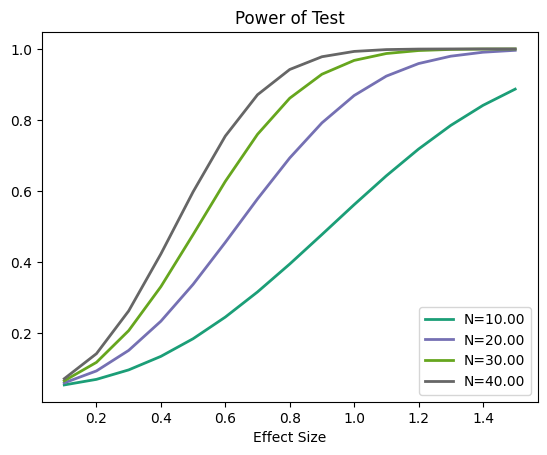

In [41]:
# power analysis varying parameters
effect_sizes = np.arange(0.1,1.6,0.1)
sample_sizes = np.array([10,20,30,40])

# plot power curves
TTestIndPower().plot_power(dep_var='effect_size', nobs=sample_sizes, effect_size=effect_sizes,alpha=0.05)
plt.show()

Analogously, the figure below shows how the power of the test increases with the sample size. It is also steeper for the larger effect size.

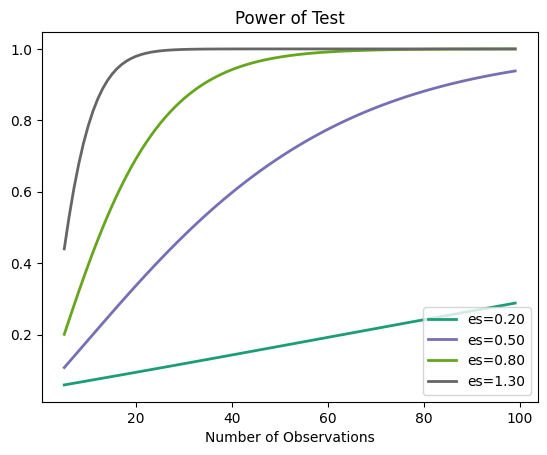

In [42]:
# power analysis varying parameters
effect_sizes = np.array([0.2, 0.5, 0.8,1.3])
sample_sizes = np.array(range(5, 100))

# plot power curves
TTestIndPower().plot_power(dep_var='nobs', nobs=sample_sizes, effect_size=effect_sizes,alpha=0.05)
plt.show()

## Means Tests for Paired Data Samples

Two samples are **paired (dependent**) if each value in one sample is paired with a corresponding value in the other sample. The typical example of paired samples is two weight measurements from the same subjects before and after the diet and exercise treatment. Another paired samples example is provided by comparing prices for college textbooks at the Campus store and online.

In some cases, the same study can be done in both paired and unpaired fashion. For example, consider a study of the effect of alcohol on people's reaction time. For a *paired* approach, we could have the same subject take the reaction time test before and after drinking alcohol. On the other hand, we could have randomly assigned all subjects to two *independent* groups. One group would drink real alcohol, while another one a non-alcoholic drink with similar taste.

In principle, if you have a choice, a paired design is much better as the test is done on the same person before and after, which removes confounding effects due to unintended bias in two groups. Obviously, in many cases, paired design is just not possible, say, comparing test scores for two different socioeconomic groups. We will consider independent samples tests in the next section.

The key observation is that because the data are paired, we can construct the **differences**. Therefore, we get just **one set of differences** and we are back to one-sample t-test derived in the previous section with the same exact code!

$$H_0 : \mu_d = 0$$
$$H_1 : \mu_d \neq 0 \text{ or } < >$$

$$SE = \frac{s_d}{\sqrt{n}}$$
$$df = n - 1$$
$$t_{df} = \frac{\bar{d}- 0}{SE}$$

where $\bar{d}$ is mean of sample differences, $n$ is number of pairs, and $sd$ is their standard deviation.

**Example**

In a test of the effectiveness of a new exercise system, 16 randomly selected subjects were observed following this system. The weight changes (before-after) have a mean of 2.7 lb and a standard deviation of 5.5 lb. The minimum value of this difference was -3.9 and the maximum was 9.1. Is there a difference at the 5% level?

**Solution**:

This is a classical example of paired before-and-after data. In fact, we are already given summaries in terms of *differences*. The only change to the code used for one-sample means tests is to set the null hypothesis $H_0$ to the true population mean difference of 0, implying no difference.

$\bm{H_0} : \mu_d = 0$ (**assume true**)

$\bm{H_1} : \mu_d \neq 0$

The hypothesis test seeks to determine if the sample mean of 2.7 is significantly different from the claimed null hypothesis 0, i.e., whether there is a significant difference before and after the exercise course.

One Mean T test detailed computation
Sample mean xbar = 2.7000
Sample standard deviation = 5.5000
Sample size n = 16
Null hypothesis claimed mean mu0 =  0
Confidence Levels [0.9, 0.95, 0.99] 

H0: mu = mu0
H1: mu not mu0 or one-sided test

xbar -+ 2.5*s bounds are -11.0500, 16.4500
Standard Error = SE = s/sqrt(n) = 5.5000/sqrt(16) = 1.3750
degree of freedom = df1 = 16-1 = 15

meansdiff = xbar - mu0 = 2.7000 - 0.0000 = 2.7000
test statistic = t1 = meansdiff/SE = 2.7000/1.3750 = 1.9636
P-values=2*(1-t.cdf(np.abs(t1),df=df1)), 2-sided and 1-sided =
 0.06838512873304659 0.03419256436652329 

Cohen D = meansdiff/s = 2.7000/5.5000 = 0.4909

Confidence Interval (CI) approach
Critical t = tstar = t.ppf(1-alpha/2,df=df1)
Margin of error = tstar*SE
CI = xbar +- MarginErr
   ConfLevel   tstar     SE  MarginErr  xbar     CIL     CIR
0       0.90  1.7531  1.375     2.4104   2.7  0.2896  5.1104
1       0.95  2.1314  1.375     2.9307   2.7 -0.2307  5.6307
2       0.99  2.9467  1.375     4.0517   2.7 

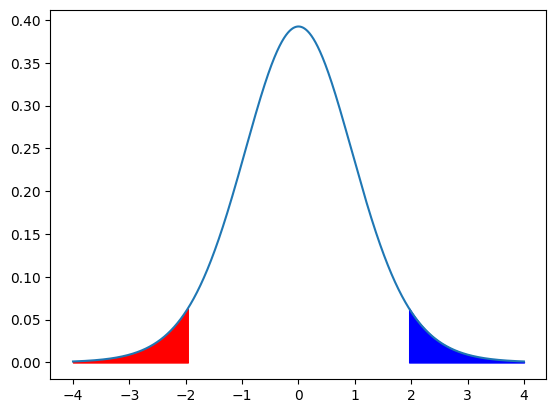

In [43]:
OneMeanTtest(xbar=2.7,s=5.5,n=16,mu0=0,ConfidenceLevels=[0.90,0.95,0.99])

The assumptions for the t-test hold the same way for differences. A simple random sample of patients ensures independence. The min/max of the differences data are within 2.5 standard deviations away from the mean, so no extreme outliers.

Therefore, the sampling distribution of $\frac{\bar{x}-\mu_0}{SE}$ (**null distribution**) is a t-distribution with $SE = \frac{s}{\sqrt{n}} = \frac{5.5}{\sqrt{16}} = 1.375$.

The **p-value** is the probability of seeing the observed sample differences mean $\bar{x} = 2.7$ or something even more extreme under the t null distribution shown in the figure above.

$$t = \frac{x - \mu_0}{SE} = \frac{2.7 - 0}{1.375} = 1.964$$

The alternative is two-sided $H_1 : \mu \neq 0$, so both tails must be accounted for. The areas under the tails add up to $p\text{-value} = 0.0684 > 0.05 = \alpha$, so we conclude that there is not enough evidence to reject the initial assumption $H_0: \mu = 0$. Thus, the exercise system does not seem to be effective.

Using a confidence interval approach, we are 95% confident (5% significance error) that the true population mean of differences is between -0.231 and 5.631, which contains the claimed $H_0 : \mu = 0$. This confirms our conclusion not to reject $H_0$.

**Example**

Consider the data set textbooks available from the openintro library. It has prices for 73 textbooks at the UCLA bookstore and Amazon. Test whether there is a difference at the 1% level.

This is another classical example of paired data—each book has a different price from two different sellers. This time, we have the actual data set, thus we can explore the boxplot and the histogram of the differences in the figure below. The mean, standard deviation, and sample size of the differences have to be computed before my step-by-step function can be applied.

$\bm{H_0} : \mu = 0$ (**assume true**)

$\bm{H_1} : \mu \neq 0$

The hypothesis test seeks to determine if the sample mean $\bar{x} = 12.762$ is significantly different from the claimed null hypothesis 0, i.e., whether there is a significant difference between the prices for the same textbooks at the UCLA bookstore and at Amazon.

In [48]:
url=f'{base_path}/UCLAtextbooks.csv'
mydata = pd.read_csv(url) # save as mydata file
mydata

,dept_abbr,course,isbn,ucla_new,amaz_new,more,diff
0,Am Ind,C170,978-0803272620,27.67,27.95,Y,-0.28
1,Anthro,9,978-0030119194,40.59,31.14,Y,9.45
2,Anthro,135T,978-0300080643,31.68,32.00,Y,-0.32
3,Anthro,191HB,978-0226206813,16.00,11.52,Y,4.48
4,Art His,M102K,978-0892365999,18.95,14.21,Y,4.74
...,...,...,...,...,...,...,...
68,Wld Art,C180,978-1412923484,48.46,39.34,N,9.12
69,Wld Art,C409A,978-0195390827,39.55,26.37,N,13.18
70,Wld Art,495,978-0820474151,29.65,24.19,Y,5.46
71,Wom Std,M144,978-1570755637,23.76,18.72,Y,5.04


Python Ttest_1sampResult built in function
Ttest_relResult(statistic=7.648771112479753, pvalue=6.927581126065491e-11) 

Python non-parametric Wilcoxon built in function
WilcoxonResult(statistic=99.0, pvalue=9.216616365779943e-12) 

One Mean T test detailed computation
Sample mean xbar = 12.7616
Sample standard deviation = 14.2553
Sample size n = 73
Null hypothesis claimed mean mu0 =  0
Confidence Levels [0.9, 0.95, 0.99] 

H0: mu = mu0
H1: mu not mu0 or one-sided test

xbar -+ 2.5*s bounds are -22.8766, 48.3999
Standard Error = SE = s/sqrt(n) = 14.2553/sqrt(73) = 1.6685
degree of freedom = df1 = 73-1 = 72

meansdiff = xbar - mu0 = 12.7616 - 0.0000 = 12.7616
test statistic = t1 = meansdiff/SE = 12.7616/1.6685 = 7.6488
P-values=2*(1-t.cdf(np.abs(t1),df=df1)), 2-sided and 1-sided =
 6.927569629056052e-11 3.463784814528026e-11 

Cohen D = meansdiff/s = 12.7616/14.2553 = 0.8952

Confidence Interval (CI) approach
Critical t = tstar = t.ppf(1-alpha/2,df=df1)
Margin of error = tstar*SE
CI = xb

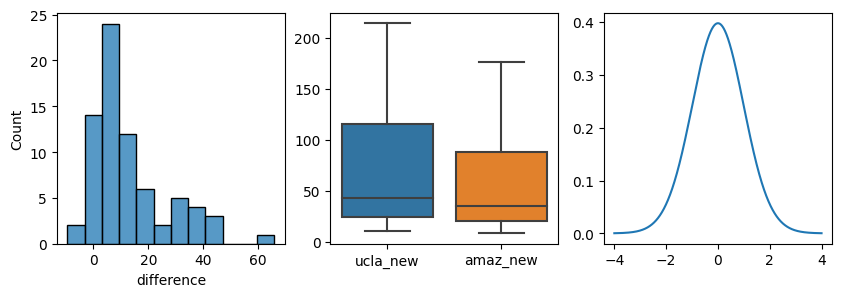

In [49]:
mydata['difference'] = mydata['ucla_new'] - mydata['amaz_new']

fig, axs = plt.subplots(1, 3, figsize=(10, 3))
sns.histplot(data=mydata,x="difference", ax=axs[0])
sns.boxplot(data=mydata[["ucla_new","amaz_new"]], ax=axs[1])

print('Python Ttest_1sampResult built in function')
print(stats.ttest_rel(mydata.ucla_new, mydata.amaz_new),'\n')

print('Python non-parametric Wilcoxon built in function')
print(wilcoxon(mydata.ucla_new, mydata.amaz_new),'\n')

# My function detailed computations
xbar1 = np.mean(mydata.difference)
s1 = np.std(mydata.difference,ddof=1)
n1 = len(mydata.difference)

OneMeanTtest(xbar=xbar1,s=s1,n=n1,mu0=0,ConfidenceLevels=[0.90,0.95,0.99])

As always, a simple random sample is assumed, which ensures independence. The histogram and boxplot above show that the data is skewed right, but the sample size $n = 73 > 30$, so the CLT guarantees the normality of the sampling distribution, and the t-test is robust to departures from normality in any case. We run the non-parametric Wilcoxon test as well for comparison—it reaches the same conclusion.

Therefore, the sampling null distribution of $\frac{\bar{x}-\mu_0}{SE}$ is approximately a t-distribution (although standard normal could have been used for such a large sample as well), where $SE = \frac{s}{\sqrt{n}} = \frac{14.255}{\sqrt{73}} = 1.668$.

The **p-value** is the probability of seeing the observed sample mean $\bar{x}$ or something even more extreme under our t null distribution shown in the figure above.

$$t = \frac{\bar{x} - \mu_0}{SE} = \frac{12.762 - 0}{1.668} = 7.649$$

The alternative is two-sided $H_1 : \mu \neq 0$, so both tails must be accounted for. The areas under the tails add up to $p\text{-value} = 6.93 \cdot 10^{-11} < 0.01 = \alpha$, so we conclude that there is enough evidence to reject the initial assumption $H_0: \mu = 0$. Thus, there is a difference in book prices.

Using the confidence interval approach, we are 99% confident (1% significance error) that the true population mean of differences is between 8.35 and 17.18, which does not contain the claimed $H_0 : \mu = 0$. This confirms our conclusion to reject $H_0$.

**Example**

To determine if a massage is effective for treating muscle pain, a pilot study was conducted where a certified therapist treated randomly chosen patients. Pain level was measured immediately before and after the treatment. The data is given in the code below. Do the data show that the treatment reduces pain? Test at the 5% level.

First, the boxplot and histogram of the differences (before - after) are explored in the figure below. Because it asks for the *reduction of pain*, it implies that the average pain scores “before” are larger than “after”; therefore it is a **one-sided test** to the right:

$\bar{H_0} : \mu_d = 0$ (**assume true**)

$\bar{H_1} : \mu_d > 0$ (**note it is a one-sided test**)

The hypothesis test determines whether the sample mean $\bar{x} = 1.65$ is significantly `larger` than the claimed null hypothesis $H_0: \mu_d = 0$, which implies a significant reduction in pain from before to after the treatment. Note `alternative = "greater"` must be used in built-in tests.

Python Ttest_1sampResult built in function
Ttest_relResult(statistic=4.066886812455412, pvalue=0.000328820598623293) 

Python non-parametric Wilcoxon built in function
WilcoxonResult(statistic=115.0, pvalue=0.0008274046414323649) 

One Mean T test detailed computation
Sample mean xbar = 1.6500
Sample standard deviation = 1.8144
Sample size n = 20
Null hypothesis claimed mean mu0 =  0
Confidence Levels [0.9, 0.95, 0.99] 

H0: mu = mu0
H1: mu not mu0 or one-sided test

xbar -+ 2.5*s bounds are -2.8860, 6.1860
Standard Error = SE = s/sqrt(n) = 1.8144/sqrt(20) = 0.4057
degree of freedom = df1 = 20-1 = 19

meansdiff = xbar - mu0 = 1.6500 - 0.0000 = 1.6500
test statistic = t1 = meansdiff/SE = 1.6500/0.4057 = 4.0669
P-values=2*(1-t.cdf(np.abs(t1),df=df1)), 2-sided and 1-sided =
 0.000657641197246539 0.0003288205986232695 

Cohen D = meansdiff/s = 1.6500/1.8144 = 0.9094

Confidence Interval (CI) approach
Critical t = tstar = t.ppf(1-alpha/2,df=df1)
Margin of error = tstar*SE
CI = xbar +- Margi

/nas.dbms/rzhb/.pyenv/versions/ts/lib/python3.10/site-packages/scipy/stats/_morestats.py:3145: UserWarning: Exact p-value calculation does not work if there are ties. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


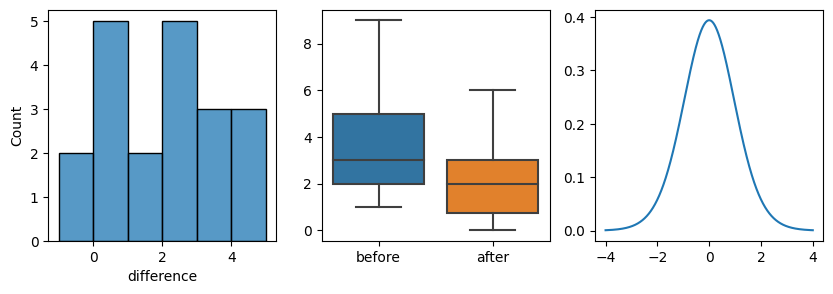

In [50]:
mydata = pd.DataFrame({'before':[2, 3, 8, 2, 3, 3, 2, 6, 2, 5, 5, 3, 3, 3, 7, 5, 1, 3, 9, 1], 
                       'after' :[0, 2, 6, 0, 0, 3, 3, 4, 1, 5, 2, 3, 0, 3, 3, 0, 2, 1, 4, 1]})
mydata['difference'] = mydata['before'] - mydata['after']

fig, axs = plt.subplots(1, 3, figsize=(10, 3))
sns.histplot(data=mydata,x="difference", ax=axs[0])
sns.boxplot(data=mydata[["before","after"]], ax=axs[1])

print('Python Ttest_1sampResult built in function')
print(stats.ttest_rel(mydata.before, mydata.after, alternative='greater'),'\n')

print('Python non-parametric Wilcoxon built in function')
print(wilcoxon(mydata.before, mydata.after, alternative='greater'),'\n')

# My function detailed computations
xbar1 = np.mean(mydata.difference)
s1 = np.std(mydata.difference,ddof=1)
n1 = len(mydata.difference)

OneMeanTtest(xbar=xbar1,s=s1,n=n1,mu0=0,ConfidenceLevels=[0.90,0.95,0.99])

A simple random sample ensures independence. The histogram and boxplot above show no extreme outliers, so assumptions of normality are not violated. Thus, the assumptions for the t-test hold.

Therefore, the sampling distribution of $\frac{\bar{x}-\mu_0}{SE}$ (**null distribution**) is a t-distribution, where $SE = \frac{s}{\sqrt{n}} = \frac{1.814}{\sqrt{20}} = 0.406$.

The **p-value** is the probability of seeing the observed sample mean $\bar{x}$ or something even more extreme under our t null distribution shown in the figure above.

$$t = \frac{\bar{x} - \mu_0}{SE} = \frac{1.65 - 0}{0.406} = 4.067$$

The alternative is one-sided to the right $H_1 : \mu > 0$, so we have to account only for the right tail area, which gives $p\text{-value} = 3.29 \cdot 10^{-4} = 0.000329 < 0.05 = \alpha$. Therefore, there is enough evidence to reject the initial assumption $H_0: \mu = 0$ at the 0.05 level (or at 0.01 as well). Thus, there is a significant reduction in pain.

For a one-sided test, we have to use $1-2\alpha = 1-2 \cdot 0.05 = 0.90$ confidence level since CI is two-sided. Therefore, we are 90% confident (for 10% significance error rate) that the true population mean is between 0.95 and 2.35, which does NOT contain the claimed $H_0 : \mu = 0$. This confirms our conclusion to reject $H_0$.

**Example**

A small sample of students is tested before and after they use the tutoring center. Test if their grades improved at the 1% level.

Once again, we have the actual data set; thus we can explore the boxplots and the histograms of the differences in the figure below. Note also that the statement of the improvement of grades means that the average scores “before” are smaller than “after”; therefore it is a *one-sided test to the left*.

$\bm{H_0} : \mu = 0$ (**assume true**)

$\bm{H_1} : \mu < 0$ (**one-sided test**)

The hypothesis test seeks to determine if the mean of the differences $\bar{x} = -2.167$ is significantly *smaller* than the claimed null hypothesis $\mu_0 = 0$, i.e., whether there is a significant improvement in the test scores due to tutoring.

Python Ttest_1sampResult built in function
Ttest_relResult(statistic=-2.381415742703763, pvalue=0.03152714133931948) 

Python non-parametric Wilcoxon built in function
WilcoxonResult(statistic=2.0, pvalue=0.046875) 

One Mean T test detailed computation
Sample mean xbar = -2.1667
Sample standard deviation = 2.2286
Sample size n = 6
Null hypothesis claimed mean mu0 =  0
Confidence Levels [0.9, 0.95, 0.98, 0.99] 

H0: mu = mu0
H1: mu not mu0 or one-sided test

xbar -+ 2.5*s bounds are -7.7382, 3.4048
Standard Error = SE = s/sqrt(n) = 2.2286/sqrt(6) = 0.9098
degree of freedom = df1 = 6-1 = 5

meansdiff = xbar - mu0 = -2.1667 - 0.0000 = -2.1667
test statistic = t1 = meansdiff/SE = -2.1667/0.9098 = -2.3814
P-values=2*(1-t.cdf(np.abs(t1),df=df1)), 2-sided and 1-sided =
 0.06305428267863888 0.03152714133931944 

Cohen D = meansdiff/s = -2.1667/2.2286 = -0.9722

Confidence Interval (CI) approach
Critical t = tstar = t.ppf(1-alpha/2,df=df1)
Margin of error = tstar*SE
CI = xbar +- MarginErr
   C

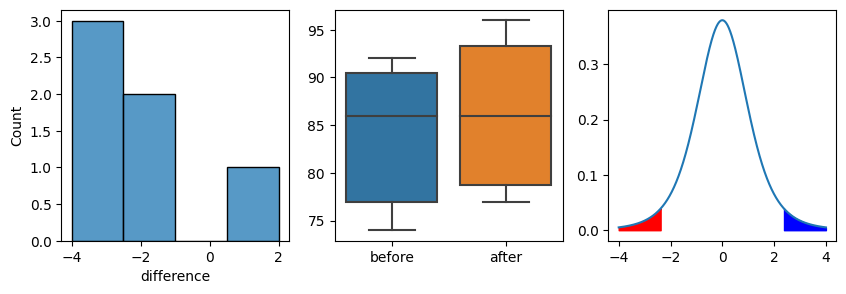

In [ ]:
mydata = pd.DataFrame({'before':[74, 89, 75, 83, 92, 91], 'after':[78, 91, 77, 81, 96, 94]})
mydata['difference'] = mydata['before'] - mydata['after']

fig, axs = plt.subplots(1, 3, figsize=(10, 3))
sns.histplot(data=mydata,x="difference", ax=axs[0])
sns.boxplot(data=mydata[["before","after"]], ax=axs[1])

print('Python Ttest_1sampResult built in function')
print(stats.ttest_rel(mydata.before, mydata.after, alternative='less'),'\n')

print('Python non-parametric Wilcoxon built in function')
print(wilcoxon(mydata.before, mydata.after, alternative='less'),'\n')

# My function detailed computations
xbar1 = np.mean(mydata.difference)
s1 = np.std(mydata.difference,ddof=1)
n1 = len(mydata.difference)

OneMeanTtest(xbar=xbar1,s=s1,n=n1,mu0=0,ConfidenceLevels=[0.90,0.95,0.98,0.99])

A simple random sample ensures independence. The data set is so small in this problem that we cannot really confirm normality from the histogram and/or boxplot; however, test scores tend to be bell-shaped, so it is reasonable to assume that the assumptions for the t-test hold.

Therefore, the sampling distribution of $\frac{\bar{x}-\mu_0}{SE}$ (**null distribution**) is a t-distribution, where $SE = \frac{s}{\sqrt{n}} = \frac{2.229}{\sqrt{6}} = 0.91$.

The **p-value** is the probability of seeing the observed sample mean $\bar{x} = -2.167$ or something even more extreme under our t null distribution shown in the figure above.

$$t = \frac{\bar{x} - \mu_0}{SE} = \frac{-2.167 - 0}{0.91} = -2.381$$

The alternative is one-sided to the left $H_1 : \mu < 0$, so we have to account only for the left tail area, which produces $p\text{-value} = 0.0315271 > 0.01 = \alpha$, so there is not enough evidence to reject the initial assumption $H_0: \mu = 0$. Thus, there is no significant improvement due to tutoring at this strict level. If the usual $\alpha = 0.05$ was used, $H_0$ would have been rejected. Thus, it is very important to be mindful of the level of significance $\alpha$.

For a one-sided test, we have to use $1 - 2\alpha = 1 - 2 \cdot 0.01 = 0.98$ confidence level since CI is two-sided (0.98 was added to the list of CI levels). Thus, we are 98% confident (2% significance error rate) that the true population mean is between -5.228 and 0.895, which contains the claimed $H_0 : \mu = 0$. This confirms our conclusion not to reject $H_0$.

If $\alpha = 0.05$ was used, $1 - 2\alpha = 1 - 2 \cdot 0.05 = 0.90$ confidence interval $(-4.000, -0.333)$ does not contain 0 and would have resulted in the rejection of $H_0$.

*Power of Paired Means Test*

For a paired means test, the **effect size** is a standardized difference between the paired groups:

$$D = \frac{\bar{d}}{sd}$$

where $\bar{d}$ is the mean of the paired differences and $sd$ is their standard deviation.

Cohen's guidelines are similar: small $D = 0.2$, medium $D = 0.5$, and large $D = 0.8$. Also, $n$ is now the number of observations per sample—the number of pairs. Otherwise, the computations and power graphs are the same as for a one-sample test.

## Means Tests for Two Independent Samples

Finally, in this longer chapter consider **two independent (not paired)** samples. Their sample means are $x_1$ and $x_2$, sample standard deviations are $s_1$ and $s_2$, and sample sizes are $n_1$ and $n_2$ (sample sizes do *not have to be equal*).

The conditions to use t-distribution for the difference of independent means are given below:
1. **Independence** between and within the groups. The two simple random samples would ensure independence within each group, and the samples have to be independent from each other (not paired).
2. **Normality** - the outlier's rules of thumb are checked for each group separately.

Hypothesis test:
$H_0 : \mu_1 = \mu_2 \iff \mu_1 - \mu_2 = 0$
$H_1 : \mu_1 \ne \mu_2 \iff \mu_1 - \mu_2 \ne 0$

The standard error for the difference of means is computed differently depending on the variances of the groups:
1. **Pooled Variance** - population variances are assumed to be equal: $\sigma_1^2 = \sigma_2^2$. If the original data are available, a Levene's test for equality of variances can assess it. If not, equality is assumed if the ratio of the larger sample standard deviation to the smaller is less than 2 (rule of thumb).

$$ \text{Pooled Variance } s_p^2 = \frac{(n_1-1)s_1^2 + (n_2-1)s_2^2}{n_1 + n_2 - 2} $$
$$ \text{Standard Error } SE = s \sqrt{\frac{1}{n_1} + \frac{1}{n_2}} $$
$$ \text{Test Statistic } t_{df} = \frac{\text{point estimate - null value}}{SE} = \frac{(\bar{x_1} - \bar{x_2}) - (\mu_1 - \mu_2)}{s_p \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}} $$
$$ \text{Degree of Freedom } df = n_1 + n_2 - 2 $$
$$ \text{Margin of Error } e = t^*_{df} SE $$
$$ \text{CI} = (\bar{x_1} - \bar{x_2}) \pm e $$

2. **Unpooled Variance**
In case the population variances cannot be assumed equal, there is no exact solution, but Welch's approximation is used:

$$ SE = \sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}} $$
$$ t_{df} = \frac{(\bar{x_1} - \bar{x_2}) - (\mu_1 - \mu_2)}{\sqrt{\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}}} $$
$$ df = \frac{\left(\frac{s_1^2}{n_1} + \frac{s_2^2}{n_2}\right)^2}{\frac{(s_1^2/n_1)^2}{n_1-1} + \frac{(s_2^2/n_2)^2}{n_2-1}} $$

$$ \text{Margin of error } e = t^*_{df} SE $$
$$ \text{CI} = (\bar{x_1} - \bar{x_2}) \pm e $$

The non-parametric analog of these t-tests is the **Mann–Whitney** test. Like other non-parametric tests, it uses the data ranks to compare the two groups rather than actual data, so it is not sensitive to skew and outliers. It is included in the code when the data is available.

**Example**

Compare the test scores of independent samples of men and women on a standardized accounting test. We take a random sample of 31 people (16 men and 15 women). Sample means are 80 and 84, and standard deviations are 12 and 14, for men and women, respectively. Note that women outperform men by 4 points, but that might be a sampling error. We would like to test whether this difference is significant at the 5% level.

$H_0 : \mu_1 = \mu_2 \iff \mu_1 - \mu_2 = 0$ (assumed true)
$H_1 : \mu_1 \ne \mu_2 \iff \mu_1 - \mu_2 \ne 0$

The function below is rather long, but it just implements the formulas outlined above.

In [52]:
def TwoMeansTtests2(x1,s1,n1,x2,s2,n2,ConfLevels):
    print('Two Independent Means T test detailed computation')

    print('Sample means, standard deviation, and sample size are:')
    print('1st Sample: x1 = {:.3f}, s1 = {:.3f}, n1 = {:d}'.format(x1,s1,n1))
    print('1st Sample: x2 = {:.3f}, s2 = {:.3f}, n2 = {:d}'.format(x2,s2,n2))

    print('Confidence Levels',ConfLevels,'\n')
    ConfLevels = np.array(ConfLevels)

    print('H0: mu1-mu2 = 0')
    print('H1: mu1-mu2 not 0 or one-sided test\n')
    print('1st sample xbar -+ 2.5*s: ({:.4f}, {:.4f})'.format(x1 - 2.5*s1,x1 + 2.5*s1))
    print('2nd sample xbar -+ 2.5*s: ({:.4f}, {:.4f})\n'.format(x2 - 2.5*s2,x2 + 2.5*s2))

    sdratio = np.maximum(s1/s2,s2/s1)
    print("standard deviations ratios <2? = {:.4f}\n".format(sdratio))

    meansdiff = x1-x2
    print('meansdiff = x1-x2 = {:.4f} - {:.4f} = {:.4f}\n'.format(x1,x2,meansdiff))
    print("=============================================")

    print("1st Pooled approach: ---------------------------------------------- ")
    sp2 = ((n1-1)*s1**2 + (n2-1)*s2**2)/(n1+n2-2)
    print("sp2 = ((n1-1)*s1**2 + (n2-1)*s2**2)/(n1+n2-2) = ")

    print(' ({:d}-1){:.3f}**2 + ({:d}-1){:.3f}**2)/({:d}+{:d}-2) = {:.3f}'.format(n1,s1,n2,s2,n1,n2,sp2))

    SE = np.sqrt(sp2*(1/n1+1/n2))
    print("SE = np.sqrt(sp*(1/n1+1/n2)) = np.sqrt({:.3f}*(1/{:d}+1/{:d}) = {:.3f}".format(sp2,n1,n2,SE))

    df1 = n1+n2-2
    print("degree of freedom = df = n1+n2-2 = {:d}+{:d}-2 = {:d}".format(n1,n2,df1))

    t1 = meansdiff/SE
    print('t = meansdiff/SE = {:.3f}/{:.3f} = {:.3f}'.format(meansdiff,SE,t1))

    pval2 = 2*(1 - t.cdf(x=abs(t1), df=df1))
    print('pval2 = 2*(1 - spst.t.cdf(x=abs(t1), df=df1))')
    print("pval two and one tailed : ", pval2, pval2/2,'\n')

    print("Compute confidence interval for the difference of means:")

    alpha = 1-ConfLevels
    tstar = t.ppf(q=1-alpha/2,df=df1)
    print("tstar = t.ppf(q=1-alpha/2,df=df1)")

    MarginErr = tstar*SE # margin of error
    print("MarginErr = tstar*SE")
    
    CIL = meansdiff - MarginErr
    CIR = meansdiff + MarginErr
    print("CIL = meansdiff - MarginErr; CIR = meansdiff + MarginErr; ")
    
    display = pd.DataFrame({'ConfLevels':ConfLevels,'tstar':tstar,
                            'SE':SE, 'MarginErr':MarginErr,'x1-x2':meansdiff,
                            'CIL':CIL,'CIR':CIR});
    pd.set_option("display.precision", 4); print(display,'\n')
    print("=========================================")

    print("2nd UNpooled approach (Welch Approximation):------------- ")
    SE = np.sqrt(s1**2/n1 + s2**2/n2)
    print("SE = np.sqrt(s1^2/n1 + s2^2/n2) = ")
    print(" sqrt({:.3f}**2/{:d} + {:.3f}**2/{:d}) = {:.3f}".format(s1,n1,s2,n2,SE))

    df1 = (s1**2/n1+s2**2/n2)**2/ \
        ((s1**2/n1)**2/(n1-1)+(s2**2/n2)**2/(n2-1));
    print("degree of freedom = df = ",df1)
    
    t1 = meansdiff/SE
    print('t = meansdiff/SE = {:.3f}/{:.3f} = {:.3f}'.format(meansdiff,SE,t1))

    pval2 = 2*(1 - t.cdf(x=abs(t1), df=df1))
    print('pval2 = 2*(1 - spst.t.cdf(x=abs(t1), df=df1))')
    print("pval two and one tailed : ", pval2, pval2/2,'\n')

    # P-value graphical illustration FYI-----------------------------
    xv = np.arange(-4, 4, 0.001)
    plt.plot(xv, t.pdf(xv,df=df1))

    xL=np.arange(-4,-np.abs(t1),0.001)
    plt.fill_between(xL,t.pdf(xL,df=df1),color='r')

    xR=np.arange(np.abs(t1),4,0.001)
    plt.fill_between(xR,t.pdf(xR,df=df1),color='b')
    #------------------------------------------------------------------

    print("Compute confidence interval for the difference of means:")
    alpha = 1-ConfLevels
    tstar = t.ppf(q=1-alpha/2,df=df1)
    print("tstar = t.ppf(q=1-alpha/2,df=df1)")

    MarginErr = tstar*SE # margin of error
    print("MarginErr = tstar*SE")

    CIL = meansdiff - MarginErr
    CIR = meansdiff + MarginErr
    print("CIL = meansdiff - MarginErr; CIR = meansdiff + MarginErr; ")

    df = pd.DataFrame({'ConfLevels':ConfLevels,'tstar':tstar,'SE':SE, 
                       'MarginErr':MarginErr,'x1-x2':meansdiff,'CIL':CIL,'CIR':CIR})
    pd.set_option("display.precision", 4); print(df,'\n')
    print("==========================================")

    print("Compute Cohen's d:")
    averagesd = (s1+s2)/2; d = meansdiff/averagesd
    
    print('averagesd = (s1+s2)/2 = ({:.3f}+{:.3f})/2 = {:.3f}'.format(s1,s2,averagesd))
    print("Cohen's d = meansdiff/averagesd = ({:.3f}/{:.3f})/2 = {:.3f}\n".format(meansdiff,averagesd,d))

Two Independent Means T test detailed computation
Sample means, standard deviation, and sample size are:
1st Sample: x1 = 80.000, s1 = 12.000, n1 = 16
1st Sample: x2 = 84.000, s2 = 14.000, n2 = 15
Confidence Levels [0.9, 0.95, 0.99] 

H0: mu1-mu2 = 0
H1: mu1-mu2 not 0 or one-sided test

1st sample xbar -+ 2.5*s: (50.0000, 110.0000)
2nd sample xbar -+ 2.5*s: (49.0000, 119.0000)

standard deviations ratios <2? = 1.1667

meansdiff = x1-x2 = 80.0000 - 84.0000 = -4.0000

1st Pooled approach: ---------------------------------------------- 
sp2 = ((n1-1)*s1**2 + (n2-1)*s2**2)/(n1+n2-2) = 
 (16-1)12.000**2 + (15-1)14.000**2)/(16+15-2) = 169.103
SE = np.sqrt(sp*(1/n1+1/n2)) = np.sqrt(169.103*(1/16+1/15) = 4.674
degree of freedom = df = n1+n2-2 = 16+15-2 = 29
t = meansdiff/SE = -4.000/4.674 = -0.856
pval2 = 2*(1 - spst.t.cdf(x=abs(t1), df=df1))
pval two and one tailed :  0.39908551964946626 0.19954275982473313 

Compute confidence interval for the difference of means:
tstar = t.ppf(q=1-alpha/2,d

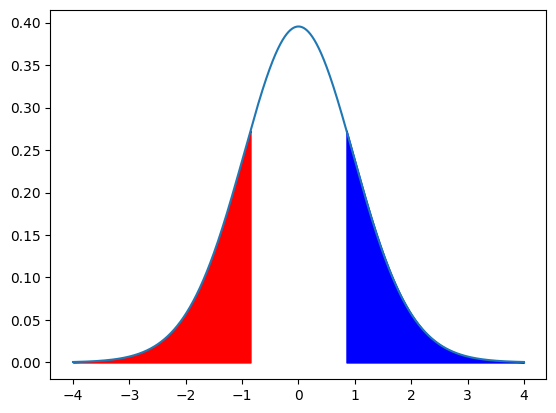

In [ ]:
TwoMeansTtests2(x1=80,s1=12,n1=16,
                x2=84,s2=14,n2=15,ConfLevels=[0.90,0.95,0.99])

The groups of men and women are independent random samples, so the independence within and between the groups should hold. We are not given min and max values to check the rule of thumb for each group, but test scores tend to be bell-shaped, so the normality could be assumed (the t-test is robust to departures from normality in any case).

The alternative $H_1 : \mu_1 - \mu_2 \ne 0$ is two-sided, so both left and right tails must be accounted for. The **p-value** is the probability of seeing the observed difference of sample means or something even more extreme and is the sum of two tails shown in the Figure above.

In this case, the standard deviations are quite close, so the pooled approach can be used, but the results for the pooled and unpooled approaches are almost the same anyway.

The p-value $> 0.05 = \alpha$, so we conclude that there is *not* enough evidence to reject the initial assumption $H_0: \mu_1 - \mu_2 = 0$. Thus, there is no significant difference between men's and women's test scores. Also, all 95% confidence intervals contain the claimed $H_0: \mu_1 - \mu_2 = 0$, which confirms our conclusion *not* to reject $H_0$.

**Example**

In this example we are given data summaries on two companies' daily pay: sample sizes 20 and 25, sample means 240 and 220, and standard deviations 26 and 12, respectively. Min and max for the 1st group are 200 and 275, and for the 2nd group 200 and 245. We would like to determine whether the difference in daily pay between the two companies is statistically significant at a 1% level.

Note that because we were told to use 1% significance level, $\alpha$ has to be set to 0.01 (confidence level 0.99).

$H_0 : \mu_1 = \mu_2 \iff \mu_1 - \mu_2 = 0$ (assumed true)

$H_1 : \mu_1 \ne \mu_2 \iff \mu_1 - \mu_2 \ne 0$

Two Independent Means T test detailed computation
Sample means, standard deviation, and sample size are:
1st Sample: x1 = 240.000, s1 = 26.000, n1 = 20
1st Sample: x2 = 220.000, s2 = 12.000, n2 = 25
Confidence Levels [0.9, 0.95, 0.99] 

H0: mu1-mu2 = 0
H1: mu1-mu2 not 0 or one-sided test

1st sample xbar -+ 2.5*s: (175.0000, 305.0000)
2nd sample xbar -+ 2.5*s: (190.0000, 250.0000)

standard deviations ratios <2? = 2.1667

meansdiff = x1-x2 = 240.0000 - 220.0000 = 20.0000

1st Pooled approach: ---------------------------------------------- 
sp2 = ((n1-1)*s1**2 + (n2-1)*s2**2)/(n1+n2-2) = 
 (20-1)26.000**2 + (25-1)12.000**2)/(20+25-2) = 379.070
SE = np.sqrt(sp*(1/n1+1/n2)) = np.sqrt(379.070*(1/20+1/25) = 5.841
degree of freedom = df = n1+n2-2 = 20+25-2 = 43
t = meansdiff/SE = 20.000/5.841 = 3.424
pval2 = 2*(1 - spst.t.cdf(x=abs(t1), df=df1))
pval two and one tailed :  0.001366515043855987 0.0006832575219279935 

Compute confidence interval for the difference of means:
tstar = t.ppf(q=1-a

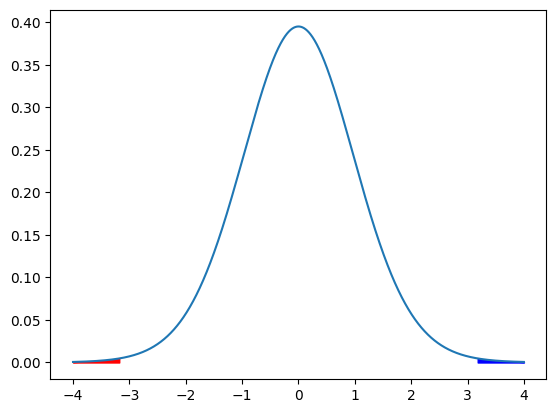

In [54]:
TwoMeansTtests2(x1=240,s1=26,n1=20,
                x2=220,s2=12,n2=25,ConfLevels=[0.90,0.95,0.99])

The groups of employees from two firms are assumed to be independent random samples, so the independence within and between the groups holds. The min and max for each group are within $\bar{x} \pm 2.5s$ bounds, so the observations are not too extreme and normality could be assumed (t-test is robust to departures from normality in any case).

The alternative $H_1 : \mu_1 - \mu_2 \ne 0$ is two-sided, so both left and right tails must be accounted for. The **p-value** is the probability of seeing the observed difference of sample means or something even more extreme and is the sum of two tails shown in the Figure above.

This time, the standard deviations ratio is more than 2 and the pooled approach should not be used. We can also see in the final output that its results are quite different. The conclusions are still the same though. The *p-value* $< 0.01 = \alpha$, so we conclude that there is enough evidence to reject the initial assumption $H_0: \mu_1 - \mu_2 = 0$. Thus, there is significant difference between groups. Also, 99% confidence interval does NOT contain the claimed 0, which confirms our conclusion to reject $H_0$.

**Example**

Consider again the `HELPrct` file. Compare mean CESD depression scores by gender. We would like to test whether there is a significant difference at the 1% level.

This time we have an actual data file, so in the Figure below we explore histogram and boxplot separated by gender. Also, Levene's test is used to assess equality of group variances.

$H_0 : \mu_1 = \mu_2 \iff \mu_1 - \mu_2 = 0$ (assumed true)

$H_1 : \mu_1 \ne \mu_2 \iff \mu_1 - \mu_2 \ne 0$

In [56]:
url=f'{base_path}/HELPrct.csv'
mydata = pd.read_csv(url) # save as mydata file
mydata[['cesd','sex']].head()

,cesd,sex
0,49,male
1,30,male
2,39,male
3,15,female
4,39,male


Results from Levene's test to check equality of variance assumption:
LeveneResult(statistic=0.37376603677822684, pvalue=0.5412666039580007) 

Independent Samples T-test built in function (assume equal variances):
Ttest_indResult(statistic=3.8800707068561255, pvalue=0.00011999508048677403) 

Independent Samples T-test built in function (NOT assume equal variances)
Ttest_indResult(statistic=3.7336691011957943, pvalue=0.0002587258441734346) 

Results from built in Non-parametric Mann Whitney function:
MannwhitneyuResult(statistic=23105.0, pvalue=0.00010334835267409345) 



<AxesSubplot: xlabel='cesd', ylabel='sex'>

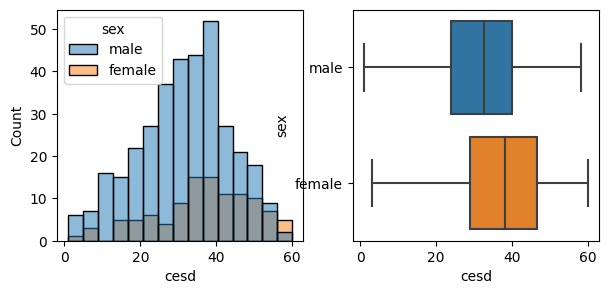

In [59]:
data1 = mydata.loc[mydata['sex']=='female']['cesd'] # 1st variable
data2 = mydata.loc[mydata['sex']=='male']['cesd'] # 2nd variable

print("Results from Levene's test to check equality of variance assumption:")
print(stats.levene(data1, data2),'\n')

print("Independent Samples T-test built in function (assume equal variances):")
print(stats.ttest_ind(data1, data2, equal_var=True),'\n')

print("Independent Samples T-test built in function (NOT assume equal variances)")
print(stats.ttest_ind(data1, data2, equal_var=False),'\n')

print("Results from built in Non-parametric Mann Whitney function:")
print(stats.mannwhitneyu(data1, data2),'\n')

fig, axs = plt.subplots(1, 2, figsize=(7, 3))
sns.histplot(data=mydata,x="cesd",hue="sex", ax=axs[0])
sns.boxplot(data=mydata,x="cesd",y="sex", ax=axs[1])

Two Independent Means T test detailed computation
Sample means, standard deviation, and sample size are:
1st Sample: x1 = 36.888, s1 = 13.018, n1 = 107
1st Sample: x2 = 31.598, s2 = 12.103, n2 = 346
Confidence Levels [0.9, 0.95, 0.99] 

H0: mu1-mu2 = 0
H1: mu1-mu2 not 0 or one-sided test

1st sample xbar -+ 2.5*s: (4.3437, 69.4320)
2nd sample xbar -+ 2.5*s: (1.3400, 61.8566)

standard deviations ratios <2? = 1.0755

meansdiff = x1-x2 = 36.8879 - 31.5983 = 5.2896

1st Pooled approach: ---------------------------------------------- 
sp2 = ((n1-1)*s1**2 + (n2-1)*s2**2)/(n1+n2-2) = 
 (107-1)13.018**2 + (346-1)12.103**2)/(107+346-2) = 151.889
SE = np.sqrt(sp*(1/n1+1/n2)) = np.sqrt(151.889*(1/107+1/346) = 1.363
degree of freedom = df = n1+n2-2 = 107+346-2 = 451
t = meansdiff/SE = 5.290/1.363 = 3.880
pval2 = 2*(1 - spst.t.cdf(x=abs(t1), df=df1))
pval two and one tailed :  0.00011999508048665675 5.999754024332837e-05 

Compute confidence interval for the difference of means:
tstar = t.ppf(q=1-

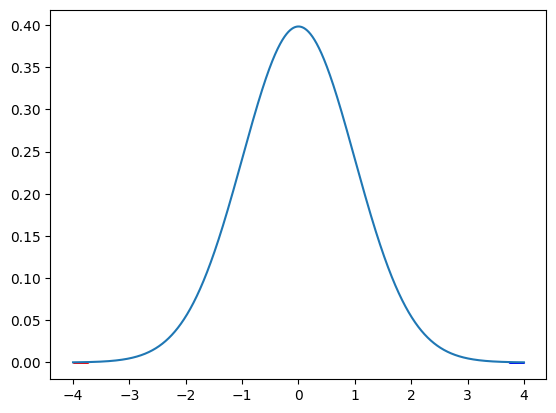

In [60]:
x1 = np.mean(data1)
s1 = np.std(data1,ddof=1)
n1 = len(data1)

x2 = np.mean(data2)
s2 = np.std(data2,ddof=1)
n2 = len(data2)

TwoMeansTtests2(x1=x1,s1=s1,n1=n1,
x2=x2,s2=s2,n2=n2,ConfLevels=[0.90,0.95,0.99])

Female and male substance abusers can be assumed to be independent random samples, so the independence within and between the groups holds. The Figure above shows histograms and boxplots for males and females. The graphs are not particularly skewed, with no extreme outliers, so we can assume normality. The sample sizes are so large that CLT guarantees the normality of sample means in any case. We also look at the non-parametric test just to compare.

Because Levene's test shows a p-value much higher than 0.05, equal variance can be assumed, and the pooled approach is justified. The pooled and unpooled approaches give the same answer anyway.

The *p-value* $< 0.01 = \alpha$, so we conclude that there is enough evidence to reject the initial assumption $H_0: \mu_1 - \mu_2 = 0$. There is a significant difference between the depression scores by gender. Also, 99% confidence interval does *not* contain the claimed 0, which confirms our conclusion to reject $H_0$.

**Example**

In this example, we would like to determine if there is a significant difference in the average prices of concert tickets in Kansas City and Salt Lake City. We sample 11 ticket stubs from Kansas City and 10 from Salt Lake City. Test the claim using a 0.05 level of significance. Note that Welch approximation is used!

This time, the data set is small and is best entered on the fly into pd.DataFrame. The Figure below shows histograms and boxplots separated by city. Levene's test is used to assess equality of group variances. Note how the data is entered in a long format: all prices are entered in the variable price, and the categorical variable city identifies which city it is from.

$H_0 : \mu_1 = \mu_2 \iff \mu_1 - \mu_2 = 0$ (assumed true)

$H_1 : \mu_1 \ne \mu_2 \iff \mu_1 - \mu_2 \ne 0$

In [67]:
mydata = pd.DataFrame({'price':[7, 8, 9, 6, 7, 7, 8, 9, 7, 7, 6, 13, 11, 16,
                                9, 14, 10, 9, 11, 8, 14],
                        'city': ["KC","KC","KC","KC","KC","KC","KC","KC","KC",
                                 "KC","KC","SL","SL","SL","SL","SL","SL","SL",
                                 "SL","SL","SL"]})

Results from Levene's test to check equality of variance assumption:
LeveneResult(statistic=6.9249668313112425, pvalue=0.01643892458076757) 

Independent Samples T-test built in function (NOT assume equal variances)
Ttest_indResult(statistic=-4.65285335326208, pvalue=0.0006297276542999839) 

Results from built in Non-parametric Mann Whitney function:
MannwhitneyuResult(statistic=5.0, pvalue=0.0004181928783958954) 



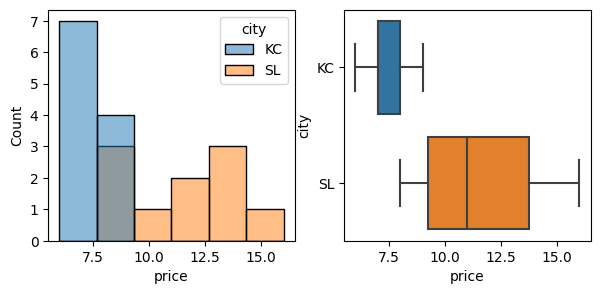

In [74]:
data1 = mydata.loc[mydata['city']=='KC']['price'] # 1st variable
data2 = mydata.loc[mydata['city']=='SL']['price'] # 2nd variable

print("Results from Levene's test to check equality of variance assumption:")
print(stats.levene(data1, data2),'\n')

print("Independent Samples T-test built in function (NOT assume equal variances)")
print(stats.ttest_ind(data1, data2, equal_var=False),'\n')

print("Results from built in Non-parametric Mann Whitney function:")
print(stats.mannwhitneyu(data1, data2),'\n')

fig, axs = plt.subplots(1, 2, figsize=(7, 3))
sns.histplot(data=mydata,x="price",hue="city", ax=axs[0])
sns.boxplot(data=mydata,x="price",y="city", ax=axs[1]);

Two Independent Means T test detailed computation
Sample means, standard deviation, and sample size are:
1st Sample: x1 = 7.364, s1 = 1.027, n1 = 11
1st Sample: x2 = 11.500, s2 = 2.635, n2 = 10
Confidence Levels [0.9, 0.95, 0.99] 

H0: mu1-mu2 = 0
H1: mu1-mu2 not 0 or one-sided test

1st sample xbar -+ 2.5*s: (4.7964, 9.9309)
2nd sample xbar -+ 2.5*s: (4.9119, 18.0881)

standard deviations ratios <2? = 2.5662

meansdiff = x1-x2 = 7.3636 - 11.5000 = -4.1364

1st Pooled approach: ---------------------------------------------- 
sp2 = ((n1-1)*s1**2 + (n2-1)*s2**2)/(n1+n2-2) = 
 (11-1)1.027**2 + (10-1)2.635**2)/(11+10-2) = 3.844
SE = np.sqrt(sp*(1/n1+1/n2)) = np.sqrt(3.844*(1/11+1/10) = 0.857
degree of freedom = df = n1+n2-2 = 11+10-2 = 19
t = meansdiff/SE = -4.136/0.857 = -4.828
pval2 = 2*(1 - spst.t.cdf(x=abs(t1), df=df1))
pval two and one tailed :  0.00011681853580802759 5.8409267904013795e-05 

Compute confidence interval for the difference of means:
tstar = t.ppf(q=1-alpha/2,df=df1)
Ma

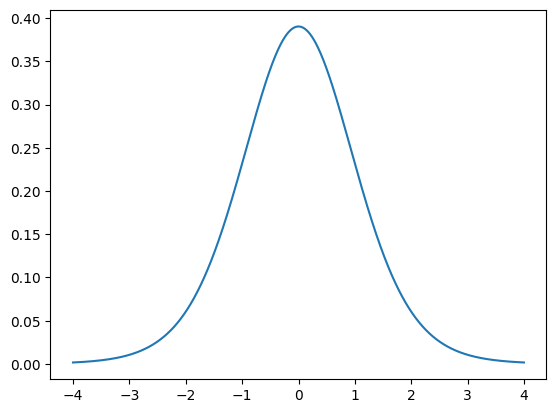

In [ ]:
x1 = np.mean(data1)
s1 = np.std(data1,ddof=1)
n1 = len(data1)

x2 = np.mean(data2)
s2 = np.std(data2,ddof=1)
n2 = len(data2)

TwoMeansTtests2(x1=x1,s1=s1,n1=n1,
                x2=x2,s2=s2,n2=n2,ConfLevels=[0.90,0.95,0.99])

The two cities' ticket prices are independent random samples, so independence within and between the groups is maintained. The Figure above shows a histogram and boxplot by group. The graphs are not extremely skewed, with no extreme outliers. We also looked at the non-parametric test to compare.

Because Levene's test shows a p-value smaller than 0.05, equal variance cannot be assumed, and a pooled approach should not be used.

Welch approximation gives two-sided *p-value* $< 0.01 = \alpha$, so we conclude that there is enough evidence to reject the initial assumption $H_0: \mu_1 - \mu_2 = 0$. There is a significant difference between the prices in the two cities. Also, 99% confidence interval does *not* contain the claimed 0, which confirms our conclusion to reject $H_0$.